<a href="https://colab.research.google.com/github/shofwatunniswah/SentimentAnalysisOnDanantara/blob/main/Perbandingan_Analisis_Sentimen_pada_Pemberitaan_Danantara_Menggunakan_Model_Logistic_Regression_dengan_Feature_Engineering_TF_IDF_dan_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Perbandingan Analisis Sentimen pada Pemberitaan Danantara Menggunakan Model Logistic Regression dengan Feature Engineering TF-IDF dan BERT**


---


Kelompok 5
* Diva Ardelia Alyadrus - 5026221029
* Shof Watun Niswah - 5026221043
* Muhammad Daffa Alvinoer Rahman - 5026221180
---


##Model LR+TF IDF

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Danantara_Augmented_Preprocessed.csv')

In [ ]:
print("Distribusi Persentase Label:")
print(df['label'].value_counts(normalize=True))

Distribusi Persentase Label:
label
netral     0.333333
Negatif    0.333333
positif    0.333333
Name: proportion, dtype: float64


In [ ]:
# prompt: coba itung berap count value yang di kolom label

print("\nDistribusi Jumlah Label:")
print(df['label'].value_counts())


Distribusi Jumlah Label:
label
netral     100
Negatif    100
positif    100
Name: count, dtype: int64


In [ ]:
# Temukan baris di mana kolom 'stemmed' memiliki nilai kosong (NaN)
baris_kosong = df[df['stemmed'].isnull()]

# Tampilkan beberapa contoh baris yang bermasalah tersebut
print(baris_kosong)

# Lihat distribusi label dari baris-baris yang akan dihapus
print("\nDistribusi label pada baris yang memiliki 'stemmed' kosong:")
print(baris_kosong['label'].value_counts())

Empty DataFrame
Columns: [title, authors, source, published_date, summary, content, url, tag, polarity, subjectivity, original, tokens_awal, no_stopwords, stemmed, label]
Index: []

Distribusi label pada baris yang memiliki 'stemmed' kosong:
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Input awal berhasil dimuat. Jumlah kolom:", len(df.columns))

# 2. Persiapan Data
df.dropna(subset=['stemmed', 'label'], inplace=True)
X_raw = df['stemmed'].astype(str)
y = df['label']

# Membersihkan dan menggabungkan kata-kata di kolom 'stemmed'
X = X_raw.apply(lambda x: x.strip("[]").replace("'", "").replace(", ", " "))

# 3. Membagi Data (tetap diperlukan untuk melatih model secara benar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 4. Vektorisasi TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Melatih Model Logistic Regression
model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)
model.fit(X_train_tfidf, y_train)

# Menampilkan laporan performa model dari data uji (tetap berguna untuk mengetahui seberapa baik modelnya)
print("="*60)
print("          Performa Model Logistic Regression")
print("="*60)
print(f"Melakukan evaluasi performa pada {len(X_test)} baris data uji...")
print(f"-"*60)
y_pred_test = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_test))


# 6. Membuat Prediksi untuk SELURUH DATA
print("\nMelakukan prediksi untuk seluruh data...")
# Mengubah seluruh data teks menjadi vektor TF-IDF menggunakan vectorizer yang sudah dilatih
X_tfidf_full = vectorizer.transform(X)
# Melakukan prediksi
all_predictions = model.predict(X_tfidf_full)


# 7. Menambahkan Hasil Prediksi ke DataFrame
# Membuat kolom baru bernama 'LR_label' sesuai permintaan Anda
df['LR_label'] = all_predictions
print("="*60)
print("Kolom 'LR_label' berhasil ditambahkan. Jumlah kolom sekarang:", len(X))


# 8. Menyimpan Hasil ke File CSV Baru
output_filename = 'Danantara_Hasil_Prediksi_LR.csv'
df.to_csv(output_filename, index=False)

print(f"\nData beserta hasil prediksi telah berhasil disimpan ke dalam file:")
print(f"'{output_filename}'")

Input awal berhasil dimuat. Jumlah kolom: 15


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


          Performa Model Logistic Regression
Melakukan evaluasi performa pada 60 baris data uji...
------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87        20
      netral       0.67      0.70      0.68        20
     positif       0.75      0.75      0.75        20

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60


Melakukan prediksi untuk seluruh data...
Kolom 'LR_label' berhasil ditambahkan. Jumlah kolom sekarang: 300

Data beserta hasil prediksi telah berhasil disimpan ke dalam file:
'Danantara_Hasil_Prediksi_LR.csv'


In [ ]:
# # Menampilkan beberapa baris pertama dari data dengan kolom baru
# print("\nContoh data dengan kolom label asli dan hasil prediksi:")
# df.head()

In [ ]:
print("\nDistribusi Jumlah Label:")
print(df['label'].value_counts())


Distribusi Jumlah Label:
label
netral     100
Negatif    100
positif    100
Name: count, dtype: int64


Eksport dataframe ke file csv

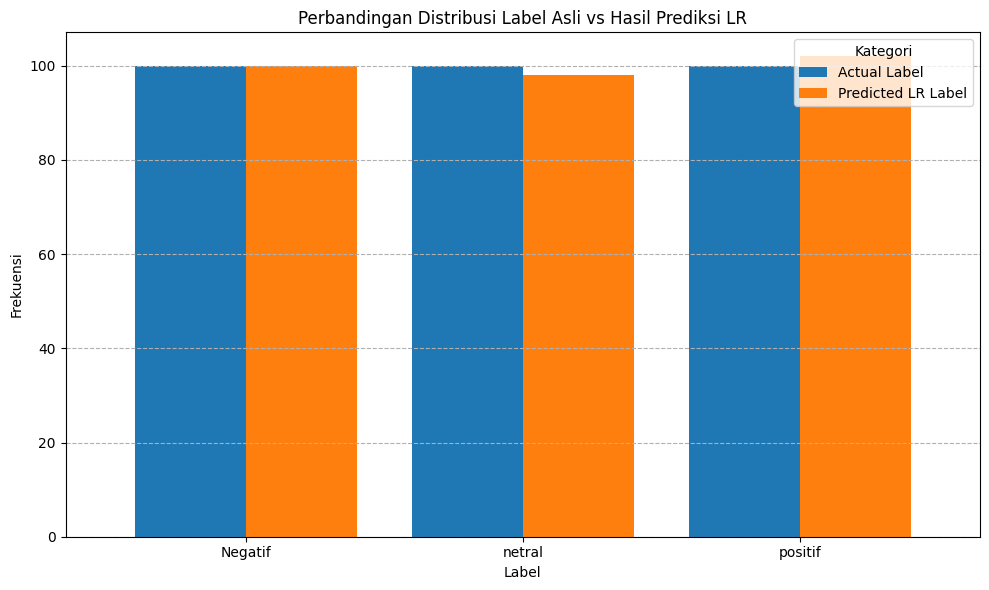

In [ ]:
# prompt: buat perbandingan antara df[label] dengan df[LR], gunakan bar char

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung frekuensi untuk label asli dan hasil prediksi
label_counts = df['label'].value_counts().sort_index()
lr_label_counts = df['LR_label'].value_counts().sort_index()

# Gabungkan kedua Series untuk plot
plot_data = pd.DataFrame({'Actual Label': label_counts, 'Predicted LR Label': lr_label_counts})

# Pastikan semua label muncul di kedua Series, isi NaN dengan 0 jika perlu
plot_data.fillna(0, inplace=True)

# Buat bar plot
plot_data.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Perbandingan Distribusi Label Asli vs Hasil Prediksi LR')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0) # Biar label di sumbu x tegak
plt.legend(title='Kategori')
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Mengatur layout agar rapi
plt.show()


Ringkasan Prediksi:
Jumlah Prediksi Benar: 278
Jumlah Prediksi Salah: 22

Perbandingan Prediksi Benar vs Salah per Kategori Label:
Prediction_Correct  Incorrect_Predictions  Correct_Predictions
label                                                         
Negatif                                 4                   96
netral                                 10                   90
positif                                 8                   92


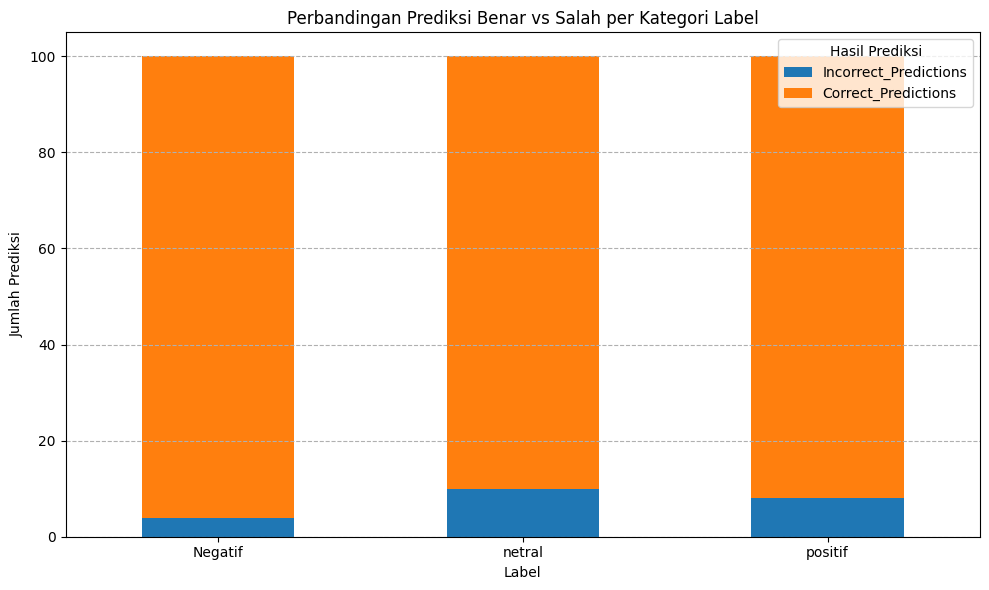

In [ ]:
# prompt: buatkan juga perbandingan antara prediksi benar dan prediksi salah

# Membuat kolom baru untuk menunjukkan apakah prediksi benar atau salah
df['Prediction_Correct'] = df['label'] == df['LR_label']

# Menghitung jumlah prediksi benar dan salah
correct_predictions_count = df['Prediction_Correct'].sum()
incorrect_predictions_count = len(df) - correct_predictions_count

print("\nRingkasan Prediksi:")
print(f"Jumlah Prediksi Benar: {correct_predictions_count}")
print(f"Jumlah Prediksi Salah: {incorrect_predictions_count}")


# Analisis lebih lanjut: Perbandingan prediksi benar/salah per kategori label
comparison_by_label = df.groupby('label')['Prediction_Correct'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih deskriptif
comparison_by_label.rename(columns={True: 'Correct_Predictions', False: 'Incorrect_Predictions'}, inplace=True)

print("\nPerbandingan Prediksi Benar vs Salah per Kategori Label:")
print(comparison_by_label)

# Visualisasi perbandingan prediksi benar/salah per kategori label
comparison_by_label.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Perbandingan Prediksi Benar vs Salah per Kategori Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Prediksi')
plt.xticks(rotation=0)
plt.legend(title='Hasil Prediksi')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


##praproses pre bert


In [ ]:
import pandas as pd
import re

def preprocess_for_bert(text):
    """
    Fungsi untuk melakukan pembersihan teks minimal yang direkomendasikan untuk BERT.
    """
    # Pastikan input adalah string
    if not isinstance(text, str):
        return ""

    # 1. Case Folding: Mengubah teks menjadi huruf kecil
    text = text.lower()

    # 2. Hapus HTML Tags
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', text)

    # 3. Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 4. Hapus Mentions (@username) dan simbol Hashtag (#)
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#', '', text)      # Hapus simbol hashtag, tapi biarkan katanya

    # 5. Hapus karakter non-standar, tapi pertahankan tanda baca penting
    # Hanya izinkan huruf, angka, spasi, dan tanda baca . , ? !
    text = re.sub(r'[^\w\s.,?!]', '', text)

    # 6. Normalisasi Spasi: Ubah spasi ganda atau lebih menjadi satu spasi
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# --- SCRIPT UTAMA ---

# Memuat dataset Anda
try:

    # Memilih kolom 'content' sebagai sumber teks mentah
    source_text_column = 'content'

    # Membuat kolom baru untuk menampung teks yang sudah bersih
    cleaned_column_name = 'cleaned_content'

    print(f"Melakukan pra-pemrosesan pada kolom '{source_text_column}'...")
    # Terapkan fungsi pra-pemrosesan ke setiap baris di kolom 'content'
    df[cleaned_column_name] = df[source_text_column].apply(preprocess_for_bert)
    print("Pra-pemrosesan selesai.")

    # Menampilkan perbandingan antara teks asli dan teks yang sudah dibersihkan
    print("\n" + "="*70)
    print("       Perbandingan Teks Asli vs Teks Bersih untuk BERT")
    print("="*70)
    # Mengatur pandas agar menampilkan teks penuh
    pd.set_option('display.max_colwidth', None)
    print(df[[source_text_column, cleaned_column_name]].head(5))

    # Menyimpan DataFrame yang sudah berisi kolom bersih ke file CSV baru
    output_filename = 'Danantara_Preprocessed_BERT.csv'
    df.to_csv(output_filename, index=False)

    print("\n" + "="*70)
    print(f"Dataset yang siap untuk BERT telah disimpan sebagai '{output_filename}'")
    print(f"Gunakan kolom '{cleaned_column_name}' dari file ini untuk proses fine-tuning BERT.")
    print("="*70)

except FileNotFoundError:
    print(f"ERROR: File '{file_path}' tidak ditemukan. Mohon periksa kembali nama dan lokasi file.")

Melakukan pra-pemrosesan pada kolom 'content'...
Pra-pemrosesan selesai.

       Perbandingan Teks Asli vs Teks Bersih untuk BERT
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

##Model BERT E5_LR3e5

In [ ]:
# Import libraries jika belum ada
# !pip install transformers torch scikit-learn pandas matplotlib seaborn

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm.notebook import tqdm
from torch.optim import AdamW

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan menggunakan GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Menggunakan device: {device}')

# Asumsi DataFrame 'df' sudah dimuat dan berisi kolom 'cleaned_content' dan 'label'
# df = pd.read_csv('nama_file_anda.csv')

# Persiapan Data
df.dropna(subset=['cleaned_content', 'label'], inplace=True)
df['cleaned_content'] = df['cleaned_content'].apply(lambda x: str(x).strip("[]").replace("'", "").replace(", ", " "))

# Encoding label
unique_labels = df['label'].unique()
label_map = {label: i for i, label in enumerate(unique_labels)}
id_map = {i: label for i, label in enumerate(unique_labels)}
df['label_encoded'] = df['label'].map(label_map)

# Pembagian Data
X = df['cleaned_content']
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

# Inisialisasi Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Custom Dataset (tidak ada perubahan di sini)
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text, add_special_tokens=True, max_length=self.max_len,
            return_token_type_ids=False, padding='max_length',
            return_attention_mask=True, return_tensors='pt', truncation=True
        )
        return {
            'text': text, 'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Parameter
MAX_LEN = 128
BATCH_SIZE = 16

# Membuat Dataset & DataLoader (tidak ada perubahan di sini)
train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist(), tokenizer, MAX_LEN)
test_dataset = SentimentDataset(X_test.tolist(), y_test.tolist(), tokenizer, MAX_LEN)
train_data_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Memuat Model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=len(unique_labels))
model = model.to(device)


# --- PERUBAHAN 1: Mengatur Hyperparameter Baru ---
print("\n" + "="*60)
print("             Menggunakan Hyperparameter Baru")
print("="*60)
EPOCHS = 5
LEARNING_RATE = 3e-5
print(f"Epochs: {EPOCHS}, Learning Rate: {LEARNING_RATE}")
print("="*60)

# Mengatur Optimizer dan Scheduler dengan LR baru
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Fungsi Pelatihan dan Evaluasi (tidak ada perubahan di sini)
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses, correct_predictions = [], 0
    for d in tqdm(data_loader, desc="Training"):
        input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss, logits = outputs.loss, outputs.logits
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, device, n_examples):
    model = model.eval()
    losses, correct_predictions = [], 0
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss, logits = outputs.loss, outputs.logits
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
    return correct_predictions.double() / n_examples, np.mean(losses)

# Loop Pelatihan dengan Epoch baru
history = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
best_accuracy = 0
best_model_filename = 'best_bert_model_E5_LR3e5.bin' # Nama file model terbaik yang baru

for epoch in range(EPOCHS):
    print(f'\nEpoch {epoch + 1}/{EPOCHS}')
    train_acc, train_loss = train_epoch(model, train_data_loader, optimizer, device, scheduler, len(X_train))
    print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')
    val_acc, val_loss = eval_model(model, test_data_loader, device, len(X_test))
    print(f'Val loss {val_loss:.4f} accuracy {val_acc:.4f}')
    history['train_acc'].append(train_acc); history['train_loss'].append(train_loss); history['val_acc'].append(val_acc); history['val_loss'].append(val_loss)
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), best_model_filename) # Simpan dengan nama file baru
        print(f"Model terbaik disimpan ke '{best_model_filename}'!")

print("\nPelatihan selesai.")

# Memuat model terbaik dari eksperimen ini
model.load_state_dict(torch.load(best_model_filename))
model = model.to(device)

# Fungsi Prediksi (tidak ada perubahan di sini)
def get_predictions(model, data_loader, device):
    model = model.eval()
    predictions, real_values = [], []
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Predicting"):
            input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            predictions.extend(preds)
            real_values.extend(labels)
    return torch.stack(predictions).cpu(), torch.stack(real_values).cpu()

# Evaluasi pada Test Set (tidak ada perubahan signifikan di sini)
_, y_pred_encoded = get_predictions(model, test_data_loader, device)
y_test_encoded = test_dataset.labels
y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
y_test_labels = [id_map[label] for label in y_test_encoded]

print("\n" + "="*60)
print("      Laporan Klasifikasi (Epoch=5, LR=3e-5)")
print("="*60)
print(classification_report(y_test_labels, y_pred_labels, target_names=unique_labels))

# ===================================================================
# === BAGIAN AKHIR: PREDIKSI SELURUH DATA & PENYIMPANAN HASIL BARU ===
# ===================================================================
print("\n" + "="*60)
print("   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)")
print("="*60)

# Membuat DataLoader untuk seluruh data
full_dataset = SentimentDataset(X.tolist(), y.tolist(), tokenizer, MAX_LEN)
full_data_loader = DataLoader(full_dataset, batch_size=32, shuffle=False)
print("DataLoader untuk seluruh data berhasil dibuat.")

# Melakukan prediksi
print("\nMelakukan prediksi pada seluruh data...")
full_predictions_encoded, _ = get_predictions(model, full_data_loader, device)
print("Prediksi untuk seluruh data selesai.")

# Menambahkan hasil prediksi ke DataFrame
full_predictions_labels = [id_map[pred.item()] for pred in full_predictions_encoded]
df['BERT_label_E5_LR3e5'] = full_predictions_labels # Nama kolom baru yang spesifik
print("\nKolom prediksi baru 'BERT_label_E5_LR3e5' berhasil ditambahkan.")

# --- PERUBAHAN 2: Menyimpan Hasil ke File CSV Baru ---
# Nama file output baru yang spesifik untuk eksperimen ini
output_filename_new_experiment = 'Hasil_Prediksi_BERT_E5_LR3e5.csv'
df.to_csv(output_filename_new_experiment, index=False)

print(f"\nDataFrame lengkap dengan hasil eksperimen baru telah disimpan ke:")
print(f"'{output_filename_new_experiment}'")

# Menampilkan perbandingan
print("\nContoh data dengan semua hasil prediksi:")
display_cols = [col for col in df.columns if 'label' in col.lower()]
df[display_cols].head()

Menggunakan device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



             Menggunakan Hyperparameter Baru
Epochs: 5, Learning Rate: 3e-05

Epoch 1/5


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Train loss 1.1037 accuracy 0.3250


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Val loss 1.0653 accuracy 0.5000
Model terbaik disimpan ke 'best_bert_model_E5_LR3e5.bin'!

Epoch 2/5


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Train loss 0.9572 accuracy 0.5958


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Val loss 0.8634 accuracy 0.7000
Model terbaik disimpan ke 'best_bert_model_E5_LR3e5.bin'!

Epoch 3/5


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Train loss 0.7867 accuracy 0.6667


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Val loss 0.7727 accuracy 0.6667

Epoch 4/5


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Train loss 0.6403 accuracy 0.7708


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Val loss 0.6615 accuracy 0.8000
Model terbaik disimpan ke 'best_bert_model_E5_LR3e5.bin'!

Epoch 5/5


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Train loss 0.6070 accuracy 0.7875


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Val loss 0.6302 accuracy 0.8667
Model terbaik disimpan ke 'best_bert_model_E5_LR3e5.bin'!

Pelatihan selesai.


Predicting:   0%|          | 0/4 [00:00<?, ?it/s]


      Laporan Klasifikasi (Epoch=5, LR=3e-5)
              precision    recall  f1-score   support

      netral       1.00      1.00      1.00        20
     Negatif       1.00      1.00      1.00        20
     positif       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)
DataLoader untuk seluruh data berhasil dibuat.

Melakukan prediksi pada seluruh data...


Predicting:   0%|          | 0/10 [00:00<?, ?it/s]

Prediksi untuk seluruh data selesai.

Kolom prediksi baru 'BERT_label_E5_LR3e5' berhasil ditambahkan.

DataFrame lengkap dengan hasil eksperimen baru telah disimpan ke:
'Hasil_Prediksi_BERT_E5_LR3e5.csv'

Contoh data dengan semua hasil prediksi:


,label,LR_label,label_encoded,BERT_label_E5_LR3e5
0,netral,netral,0,netral
1,netral,netral,0,netral
2,Negatif,Negatif,1,Negatif
3,positif,Negatif,2,Negatif
4,netral,netral,0,netral



Confusion Matrix (Test Set):


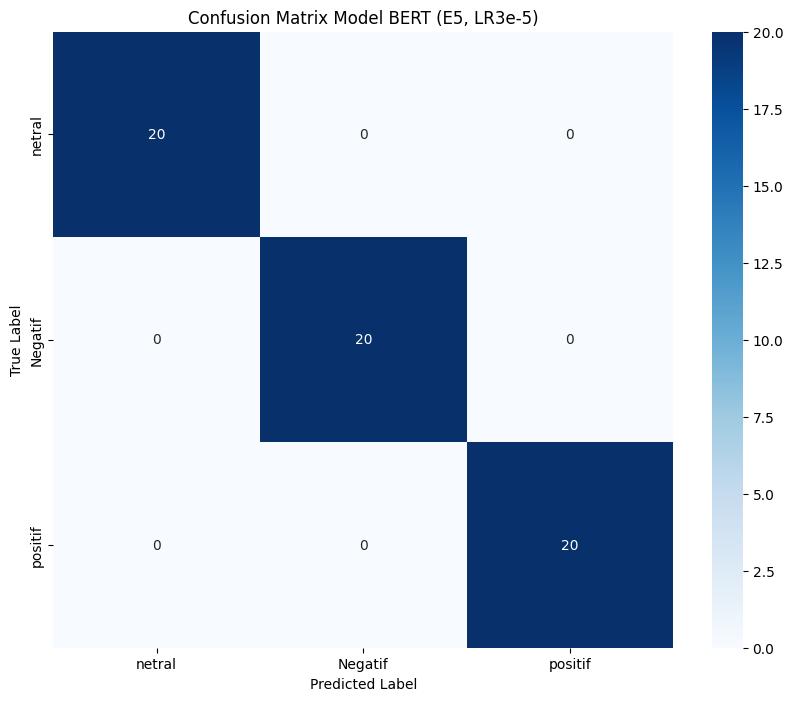

Model terbaik 'best_bert_model_E5_LR3e5.bin' berhasil dimuat untuk evaluasi akhir.


Predicting:   0%|          | 0/4 [00:00<?, ?it/s]


      Laporan Klasifikasi (Epoch=5, LR=3e-5)
              precision    recall  f1-score   support

      netral       0.87      1.00      0.93        20
     Negatif       0.94      0.75      0.83        20
     positif       0.81      0.85      0.83        20

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.87      0.87      0.86        60


Confusion Matrix (Test Set):


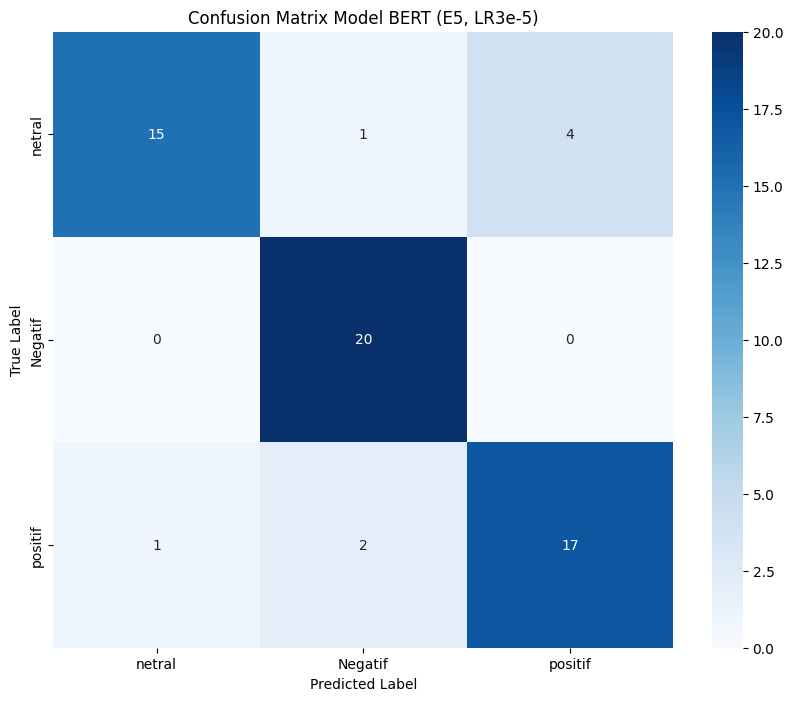


   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)
DataLoader untuk seluruh data berhasil dibuat.


Predicting:   0%|          | 0/10 [00:00<?, ?it/s]

Prediksi untuk seluruh data selesai.

Kolom prediksi baru 'BERT_label_E5_LR3e5' berhasil ditambahkan.

DataFrame lengkap telah disimpan ke 'Hasil_Prediksi_BERT_E5_LR3e5.csv'

Visualisasi Perbandingan Distribusi Label:


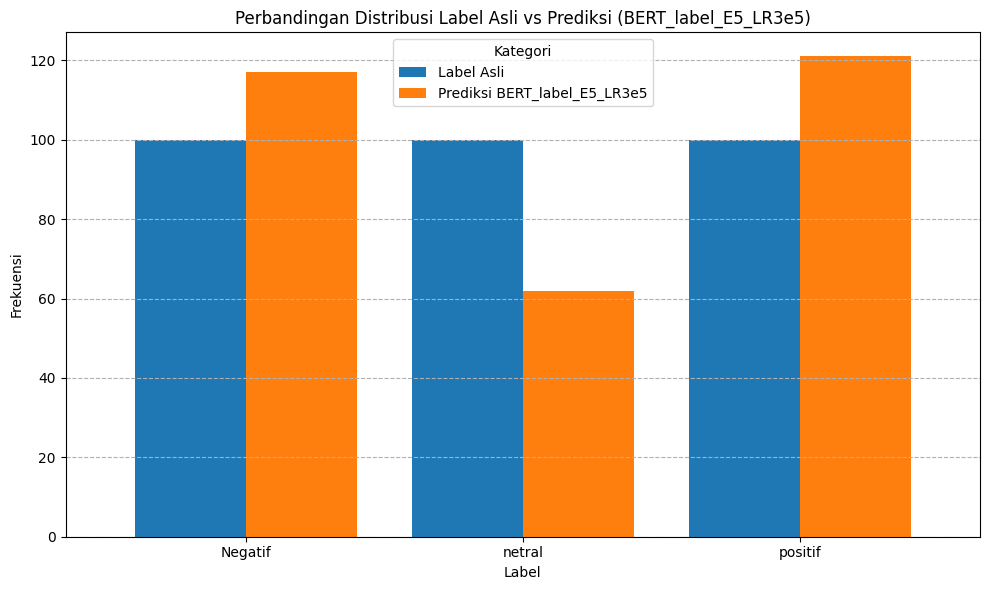


Ringkasan Prediksi (Eksperimen E5, LR3e-5):
Jumlah Prediksi Benar: 258
Jumlah Prediksi Salah: 42

Perbandingan Prediksi Benar vs Salah per Kategori Label:
BERT_Correct_E5_LR3e5  Prediksi Salah  Prediksi Benar
label                                                
Negatif                             0             100
netral                             39              61
positif                             3              97


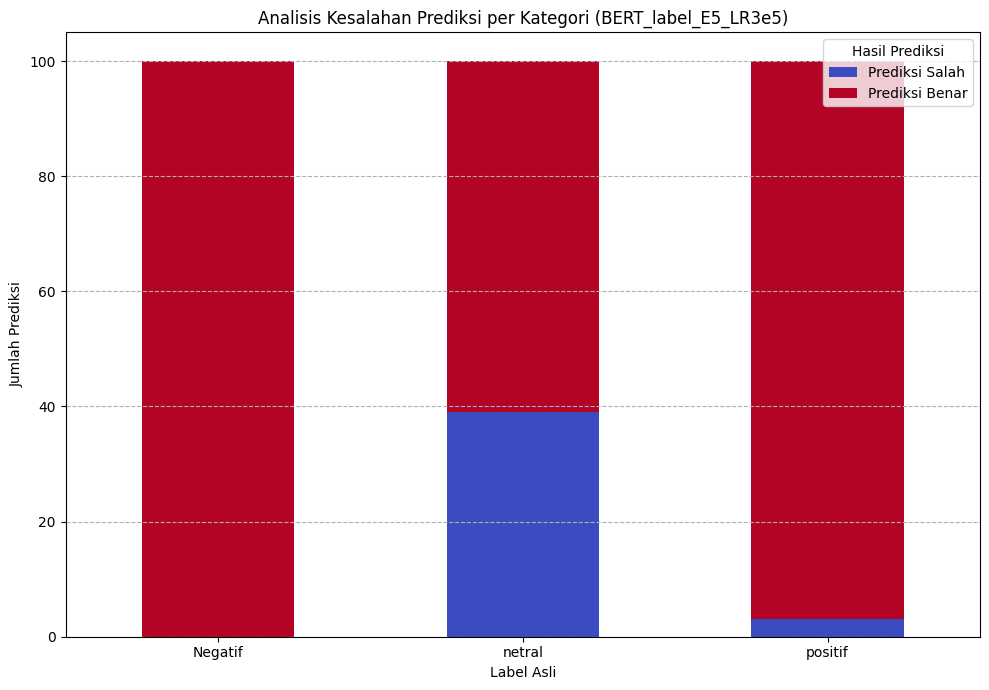


Plotting Training History (Eksperimen E5, LR3e-5):


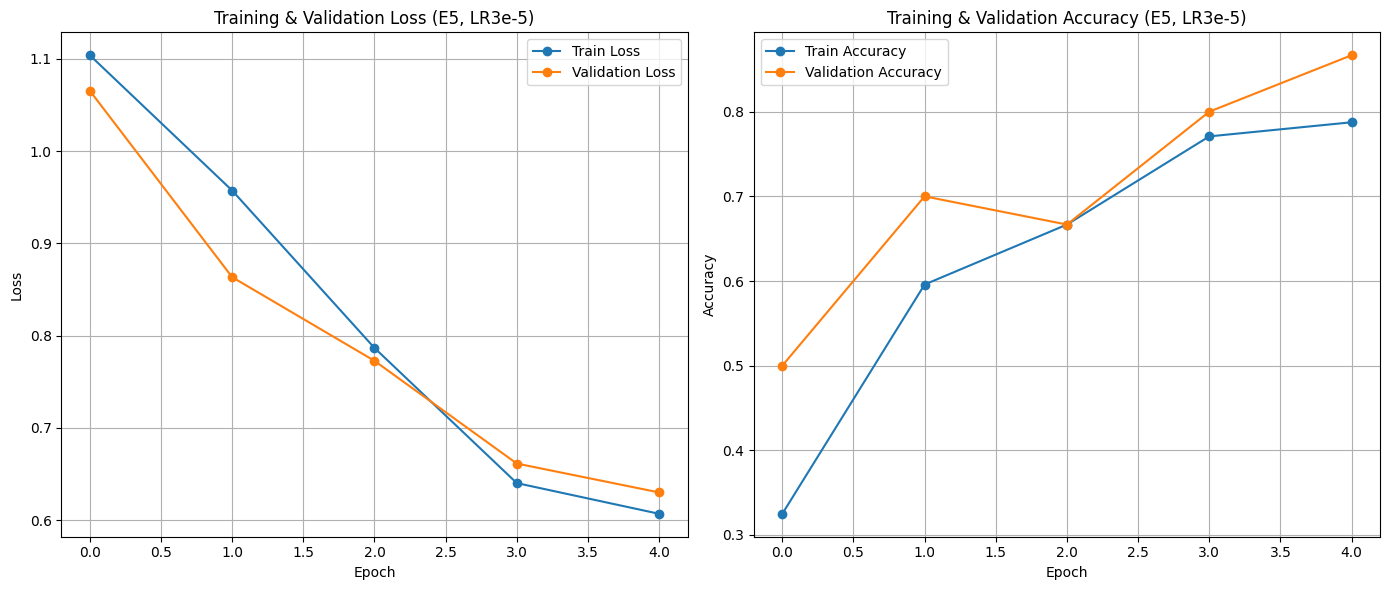

In [ ]:
# ===================================================================
# === BAGIAN AKHIR: ANALISIS MENDALAM & VISUALISASI HASIL ===
# ===================================================================

# Tampilkan Confusion Matrix
print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix Model BERT (E5, LR3e-5)') # Judul sudah disesuaikan
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# ===================================================================
# === EVALUASI, PREDIKSI, & ANALISIS LENGKAP (Eksperimen E5, LR3e-5) ===
# ===================================================================

# Memuat model terbaik dari eksperimen ini
# Pastikan nama file ini sesuai dengan yang Anda simpan di loop training
best_model_filename = 'best_bert_model_E5_LR3e5.bin'
model.load_state_dict(torch.load(best_model_filename))
model = model.to(device)
print(f"Model terbaik '{best_model_filename}' berhasil dimuat untuk evaluasi akhir.")

# --- Bagian A: Evaluasi Performa pada Test Set ---

# Fungsi Prediksi (pastikan sudah terdefinisi dari sel sebelumnya)
def get_predictions(model, data_loader, device):
    model = model.eval()
    texts, predictions, prediction_probs, real_values = [], [], [], []
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Predicting"):
            texts.extend(d["text"])
            input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)
            predictions.extend(preds)
            prediction_probs.extend(torch.softmax(logits, dim=1).tolist())
            real_values.extend(labels)
    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values

# Dapatkan prediksi HANYA untuk data uji
_, y_pred_encoded, _, y_test_encoded_tensors = get_predictions(model, test_data_loader, device)

# Ubah hasil prediksi kembali ke label asli
y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
y_test_labels = [id_map[label.item()] for label in y_test_encoded_tensors]

# Tampilkan Laporan Klasifikasi
print("\n" + "="*60)
print("      Laporan Klasifikasi (Epoch=5, LR=3e-5)")
print("="*60)
print(classification_report(y_test_labels, y_pred_labels, target_names=unique_labels))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix Model BERT (E5, LR3e-5)') # Judul disesuaikan
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Bagian B: Prediksi pada Seluruh Data dan Penyimpanan ---

print("\n" + "="*60)
print("   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)")
print("="*60)

# Membuat DataLoader untuk seluruh data
full_dataset = SentimentDataset(X.tolist(), y.tolist(), tokenizer, MAX_LEN)
full_data_loader = DataLoader(full_dataset, batch_size=32, shuffle=False)
print("DataLoader untuk seluruh data berhasil dibuat.")

# Melakukan prediksi pada seluruh data
full_texts, full_predictions_encoded, _, _ = get_predictions(model, full_data_loader, device)
print("Prediksi untuk seluruh data selesai.")

# Mengubah hasil prediksi kembali ke label asli
full_predictions_labels = [id_map[pred.item()] for pred in full_predictions_encoded]

# Menambahkan hasil prediksi ke DataFrame dengan nama kolom baru yang spesifik
new_col_name = 'BERT_label_E5_LR3e5' # Nama kolom disesuaikan
df[new_col_name] = full_predictions_labels
print(f"\nKolom prediksi baru '{new_col_name}' berhasil ditambahkan.")

# Menyimpan Hasil ke File CSV Baru yang spesifik
output_filename_new_experiment = 'Hasil_Prediksi_BERT_E5_LR3e5.csv' # Nama file disesuaikan
df.to_csv(output_filename_new_experiment, index=False)
print(f"\nDataFrame lengkap telah disimpan ke '{output_filename_new_experiment}'")


# --- Bagian C: Analisis Mendalam dan Visualisasi ---

# 1. Visualisasi Perbandingan Distribusi Label
print("\nVisualisasi Perbandingan Distribusi Label:")
label_counts_asli = df['label'].value_counts().sort_index()
label_counts_prediksi = df[new_col_name].value_counts().sort_index() # Menggunakan kolom baru
plot_data = pd.DataFrame({'Label Asli': label_counts_asli, f'Prediksi {new_col_name}': label_counts_prediksi})
plot_data.fillna(0, inplace=True)
plot_data.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title(f'Perbandingan Distribusi Label Asli vs Prediksi ({new_col_name})') # Judul disesuaikan
plt.xlabel('Label'); plt.ylabel('Frekuensi'); plt.xticks(rotation=0)
plt.legend(title='Kategori'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()

# 2. Analisis Prediksi Benar vs Salah
correct_col_name = 'BERT_Correct_E5_LR3e5' # Nama kolom baru
df[correct_col_name] = df['label'] == df[new_col_name]
correct_predictions_count = df[correct_col_name].sum()
incorrect_predictions_count = len(df) - correct_predictions_count
print("\nRingkasan Prediksi (Eksperimen E5, LR3e-5):")
print(f"Jumlah Prediksi Benar: {correct_predictions_count}")
print(f"Jumlah Prediksi Salah: {incorrect_predictions_count}")

# 3. Analisis Benar/Salah per Kategori Label
comparison_by_label = df.groupby('label')[correct_col_name].value_counts().unstack(fill_value=0)
comparison_by_label.rename(columns={True: 'Prediksi Benar', False: 'Prediksi Salah'}, inplace=True)
print("\nPerbandingan Prediksi Benar vs Salah per Kategori Label:")
print(comparison_by_label)
comparison_by_label.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm')
plt.title(f'Analisis Kesalahan Prediksi per Kategori ({new_col_name})') # Judul disesuaikan
plt.xlabel('Label Asli'); plt.ylabel('Jumlah Prediksi'); plt.xticks(rotation=0)
plt.legend(title='Hasil Prediksi'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()

# 4. Plotting Training History
print("\nPlotting Training History (Eksperimen E5, LR3e-5):")
plt.figure(figsize=(14, 6))
# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss (E5, LR3e-5)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot([h.cpu().numpy() if isinstance(h, torch.Tensor) else h for h in history['train_acc']], label='Train Accuracy', marker='o')
plt.plot([h.cpu().numpy() if isinstance(h, torch.Tensor) else h for h in history['val_acc']], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy (E5, LR3e-5)')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
display_cols = [col for col in df.columns if 'label' in col.lower()]
df[display_cols].head(15)

,label,LR_label,label_encoded,BERT_label_E5_LR3e5
0,netral,netral,0,netral
1,netral,netral,0,netral
2,Negatif,Negatif,1,Negatif
3,positif,Negatif,2,Negatif
4,netral,netral,0,netral
5,netral,netral,0,Negatif
6,Negatif,Negatif,1,Negatif
7,Negatif,Negatif,1,Negatif
8,positif,positif,2,positif
9,Negatif,Negatif,1,Negatif


In [ ]:
# Identifikasi kasus di mana BERT benar tapi LR salah
bert_correct_lr_incorrect_indices = df.index[
    (df['BERT_label_E5_LR3e5'] == df['label']) &  # BERT benar
    (df['LR_label'] != df['label'])             # LR salah
].tolist()

print("Index baris di mana prediksi BERT benar tapi prediksi LR salah:")
print(bert_correct_lr_incorrect_indices)

# Jika Anda ingin menampilkan ringkasan baris-baris tersebut (tanpa konten penuh)
print("\nSummary (Label, LR_label, BERT_label_E5_LR3e5) for these indices:")
if bert_correct_lr_incorrect_indices:
    # Ambil subset DataFrame untuk index yang diinginkan
    summary_df = df.loc[bert_correct_lr_incorrect_indices, ['label', 'LR_label', 'BERT_label_E5_LR3e5']]
    print(summary_df)
else:
    print("Tidak ada baris yang memenuhi kriteria.")

ValueError: Mix of label input types (string and number)

In [ ]:
#5b Menjelaskan Kemampuan BERT (terutama untuk kalimat ambigu, panjang, atau sarkastik)
print("\n" + "="*60)
print("            Analisis Kemampuan BERT vs Logistic Regression")
print("="*60)
print("a. Apakah BERT mampu mengklasifikasikan sentimen dengan lebih baik (terutama untuk kalimat ambigu, panjang, atau sarkastik)?")
print("-" * 60)
print("Secara teoritis dan umum berdasarkan riset, model berbasis Transformer seperti BERT cenderung memiliki kemampuan yang lebih baik dalam memahami konteks, nuansa, dan hubungan antar kata dalam kalimat dibandingkan model tradisional seperti Logistic Regression + TF-IDF.")
print("\nAlasan utamanya adalah:")
print("- **Pemahaman Konteks:** BERT membaca teks secara bidirectional (dua arah) menggunakan mekanisme *attention*. Ini memungkinkannya memahami makna sebuah kata berdasarkan kata-kata di sekitarnya, baik sebelum maupun sesudahnya. Model TF-IDF+LR memperlakukan teks sebagai 'Bag-of-Words' atau 'Bag-of-Ngrams', yang kehilangan banyak informasi kontekstual.")
print("- **Menangani Ambiguitas:** Dengan pemahaman konteks yang lebih baik, BERT lebih mampu membedakan makna kata atau frasa yang sama di konteks yang berbeda, sehingga lebih baik dalam menangani ambiguitas.")
print("- **Kalimat Panjang:** BERT dapat memproses urutan teks yang lebih panjang (hingga *max_len* yang ditentukan) dan mempertahankan representasi kontekstual di seluruh urutan tersebut. TF-IDF + LR kesulitan menangani ketergantungan jangka panjang dalam kalimat panjang.")
print("- **Sarkasme dan Nuansa Halus:** Sarkasme seringkali bergantung pada kontras antara makna literal kata dan konteksnya, serta pemahaman intonasi (dalam teks diwakili oleh tanda baca, kata-kata penekanan, dll.). Kemampuan BERT untuk memahami hubungan kompleks antar kata dan menangkap pola-pola ini membuatnya berpotensi lebih baik dalam mendeteksi sarkasme atau sentimen halus lainnya.")
print("\n**Kesimpulan Teoritis:** Ya, BERT *seharusnya* mampu mengklasifikasikan sentimen dengan lebih baik, terutama pada kasus-kasus kompleks seperti kalimat ambigu, panjang, atau yang mengandung sarkasme, karena arsitekturnya yang canggih dalam pemahaman bahasa.")
print("\n**Validasi Praktis:** Untuk memvalidasi ini secara empiris pada dataset spesifik Anda, kita perlu menganalisis kasus-kasus di mana LR salah dan BERT benar, terutama pada kalimat-kalimat yang memiliki karakteristik tersebut (ambigu, panjang, sarkastik). Confusion Matrix dan Classification Report yang sudah Anda hasilkan sebelumnya memberikan gambaran agregat, namun analisis per kasus lebih mendalam diperlukan untuk membuktikannya.")

# 3. Menunjukkan Contoh Prediksi yang Sebelumnya Salah Diklasifikasikan (oleh LR), Tapi Benar dengan BERT
print("\nb. Tunjukkan contoh prediksi yang sebelumnya salah diklasifikasikan (oleh LR), tapi benar dengan BERT.")
print("-" * 60)

# Identifikasi kasus di mana LR salah, tapi BERT benar
incorrect_by_lr_correct_by_bert = df[
    (df['LR_label'] != df['label']) &  # LR salah
    (df['BERT_label_E5_LR3e5'] == df['label']) # BERT benar
]

print(f"Ditemukan {len(incorrect_by_lr_correct_by_bert)} contoh di mana LR salah dan BERT benar.")

if not incorrect_by_lr_correct_by_bert.empty:
    print("\nBeberapa contoh kasus:")
    # Ambil beberapa contoh (misalnya 5 contoh)
    examples_to_show = incorrect_by_lr_correct_by_bert.head(5)

    # Tampilkan kolom yang relevan
    cols_to_display = ['content', 'label', 'LR_label', 'BERT_label_E5_LR3e5']
    print(examples_to_show[cols_to_display])

    print("\nAnalisis ringkas contoh:")
    for index, row in examples_to_show.iterrows():
        print(f"\n--- Contoh Index {index} ---")
        print(f"Teks: {row['content']}")
        print(f"Label Asli: {row['label']}")
        print(f"Prediksi LR: {row['LR_label']} (Salah)")
        print(f"Prediksi BERT: {row['BERT_label_E5_LR3e5']} (Benar)")
        # Anda bisa menambahkan kode untuk menganalisis karakteristik teks ini
        # Apakah teksnya panjang? Ambigu? Mengandung sarkasme?
        # Ini memerlukan analisis manual per contoh atau pola yang lebih canggih.
        print("Analisis karakteristik teks (panjang, ambigu, sarkasme, dll.) diperlukan untuk menjelaskan mengapa BERT berhasil di sini.")

else:
    print("Tidak ada contoh ditemukan di mana LR salah dan BERT benar dalam dataset ini.")
    print("Ini bisa terjadi jika performa LR sudah sangat baik, atau jika perbaikan BERT tidak signifikan pada dataset spesifik ini.")

print("\n" + "="*60)
print("            Akhir Analisis Perbandingan Model")
print("="*60)


##Model BERT

In [ ]:
# # !pip install transformers torch scikit-learn

# import pandas as pd
# import torch
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from tqdm.notebook import tqdm
# from torch.optim import AdamW
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns


In [ ]:
# # Pastikan menggunakan GPU jika tersedia
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f'Menggunakan device: {device}')

# # Drop NA di kolom yang relevan (sudah dilakukan sebelumnya, tapi diulang untuk memastikan)
# df.dropna(subset=['cleaned_content', 'label'], inplace=True)

# # Membersihkan dan menggabungkan kata-kata di kolom 'cleaned_content' (sudah dilakukan, diulang untuk konsistensi)
# df['cleaned_content'] = df['cleaned_content'].apply(lambda x: x.strip("[]").replace("'", "").replace(", ", " "))

# # Encoding label ke dalam bentuk numerik
# # Dapatkan daftar label unik
# unique_labels = df['label'].unique()
# label_map = {label: i for i, label in enumerate(unique_labels)}
# id_map = {i: label for i, label in enumerate(unique_labels)} # Untuk mapping kembali ke label asli
# df['label_encoded'] = df['label'].map(label_map)

# # Membagi Data
# X = df['cleaned_content']
# y = df['label_encoded']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# # Reset index setelah split untuk memastikan konsistensi dengan DataLoader
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

In [ ]:
# # Inisialisasi Tokenizer BERT
# # Menggunakan model BERT base multilingual karena data mungkin berbahasa Indonesia
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# # Membuat Custom Dataset
# class SentimentDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, item):
#         text = str(self.texts[item])
#         label = self.labels[item]

#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             return_token_type_ids=False,
#             padding='max_length',  # Changed pad_to_max_length to padding
#             return_attention_mask=True,
#             return_tensors='pt',
#             truncation=True
#         )

#         return {
#             'text': text,
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'labels': torch.tensor(label, dtype=torch.long)
#         }

# # Parameter untuk Dataset dan DataLoader
# MAX_LEN = 128 # Panjang maksimum sekuens token
# BATCH_SIZE = 16 # Ukuran batch

# # Membuat instance Dataset
# train_dataset = SentimentDataset(
#     texts=X_train.tolist(),
#     labels=y_train.tolist(),
#     tokenizer=tokenizer,
#     max_len=MAX_LEN
# )

# test_dataset = SentimentDataset(
#     texts=X_test.tolist(),
#     labels=y_test.tolist(),
#     tokenizer=tokenizer,
#     max_len=MAX_LEN
# )

# # Membuat instance DataLoader
# train_data_loader = DataLoader(
#     train_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True
# )

# test_data_loader = DataLoader(
#     test_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False
# )

# # Memuat Model BERT untuk Klasifikasi Sekuens
# # Jumlah output neuron sama dengan jumlah kelas unik
# model = BertForSequenceClassification.from_pretrained(
#     'bert-base-multilingual-uncased',
#     num_labels=len(unique_labels)
# )
# model = model.to(device)

# # Mengatur Optimizer dan Scheduler
# EPOCHS = 3 # Jumlah epoch pelatihan
# LEARNING_RATE = 2e-5 # Learning rate

# optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# total_steps = len(train_data_loader) * EPOCHS

# from transformers.optimization import get_linear_schedule_with_warmup

# scheduler = get_linear_schedule_with_warmup(
#     optimizer,
#     num_warmup_steps=0,
#     num_training_steps=total_steps
# )

In [ ]:
# # Fungsi Pelatihan
# def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
#     model = model.train()
#     losses = []
#     correct_predictions = 0

#     for d in tqdm(data_loader, desc="Training"):
#         input_ids = d["input_ids"].to(device)
#         attention_mask = d["attention_mask"].to(device)
#         labels = d["labels"].to(device)

#         optimizer.zero_grad()

#         outputs = model(
#             input_ids=input_ids,
#             attention_mask=attention_mask,
#             labels=labels
#         )

#         loss = outputs.loss
#         logits = outputs.logits
#         _, preds = torch.max(logits, dim=1)

#         correct_predictions += torch.sum(preds == labels)
#         losses.append(loss.item())

#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         optimizer.step()
#         scheduler.step()

#     return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# # Fungsi Evaluasi
# def eval_model(model, data_loader, device, n_examples):
#     model = model.eval()
#     losses = []
#     correct_predictions = 0

#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Evaluating"):
#             input_ids = d["input_ids"].to(device)
#             attention_mask = d["attention_mask"].to(device)
#             labels = d["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 labels=labels
#             )

#             loss = outputs.loss
#             logits = outputs.logits
#             _, preds = torch.max(logits, dim=1)

#             correct_predictions += torch.sum(preds == labels)
#             losses.append(loss.item())

#     return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# # Melatih Model
# print("\n" + "="*60)
# print("          Memulai Pelatihan Model BERT")
# print("="*60)

# history = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
# best_accuracy = 0

# for epoch in range(EPOCHS):
#     print(f'\nEpoch {epoch + 1}/{EPOCHS}')
#     print('-' * 10)

#     train_acc, train_loss = train_epoch(
#         model,
#         train_data_loader,
#         optimizer,
#         device,
#         scheduler,
#         len(X_train)
#     )

#     print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')

#     val_acc, val_loss = eval_model(
#         model,
#         test_data_loader,
#         device,
#         len(X_test)
#     )

#     print(f'Val loss {val_loss:.4f} accuracy {val_acc:.4f}')

#     history['train_acc'].append(train_acc)
#     history['train_loss'].append(train_loss)
#     history['val_acc'].append(val_acc)
#     history['val_loss'].append(val_loss)

#     # Simpan model terbaik berdasarkan akurasi validasi
#     if val_acc > best_accuracy:
#         best_accuracy = val_acc
#         torch.save(model.state_dict(), 'best_bert_model_state.bin')
#         print("Model terbaik disimpan!")

# print("\nPelatihan selesai.")

In [ ]:
# # Memuat model terbaik untuk evaluasi akhir
# model.load_state_dict(torch.load('best_bert_model_state.bin'))
# model = model.to(device)

# # Melakukan Prediksi pada Data Uji
# def get_predictions(model, data_loader, device):
#     model = model.eval()

#     texts = []
#     predictions = []
#     prediction_probs = []
#     real_values = []

#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Predicting"):
#             texts.extend(d["text"])
#             input_ids = d["input_ids"].to(device)
#             attention_mask = d["attention_mask"].to(device)
#             labels = d["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask
#             )

#             logits = outputs.logits
#             _, preds = torch.max(logits, dim=1)

#             predictions.extend(preds)
#             prediction_probs.extend(torch.softmax(logits, dim=1).tolist())
#             real_values.extend(labels)

#     predictions = torch.stack(predictions).cpu()
#     real_values = torch.stack(real_values).cpu()
#     return texts, predictions, prediction_probs, real_values

# print("\n" + "="*60)
# print("        Melakukan Prediksi pada Data Uji")
# print("="*60)
# y_texts, y_pred_encoded, y_pred_probs, y_test_encoded = get_predictions(
#     model,
#     test_data_loader,
#     device
# )

# # Mengubah hasil prediksi kembali ke label asli
# y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
# y_test_labels = [id_map[label.item()] for label in y_test_encoded]

In [ ]:
# # Evaluasi Performa
# print("\n" + "="*60)
# print("            Evaluasi Performa Model BERT")
# print("="*60)
# print(f"Melakukan evaluasi performa pada {len(y_test_labels)} baris data uji...")
# print(f"-"*60)
# print(classification_report(y_test_labels, y_pred_labels, target_names=unique_labels))

# # Confusion Matrix
# print("\nConfusion Matrix:")
# cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)

# # Plot Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
# plt.title('Confusion Matrix Model BERT')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


# # Melakukan Prediksi untuk SELURUH DATA
# print("\n" + "="*60)
# print("      Melakukan Prediksi untuk Seluruh Data")
# print("="*60)

# # Membuat DataLoader untuk seluruh data
# full_dataset = SentimentDataset(
#     texts=X.tolist(),
#     labels=y.tolist(), # Menggunakan label_encoded untuk konsistensi
#     tokenizer=tokenizer,
#     max_len=MAX_LEN
# )

# full_data_loader = DataLoader(
#     full_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False
# )

# full_texts, full_predictions_encoded, full_prediction_probs, full_real_values_encoded = get_predictions(
#     model,
#     full_data_loader,
#     device
# )

# # Mengubah hasil prediksi kembali ke label asli
# full_predictions_labels = [id_map[pred.item()] for pred in full_predictions_encoded]

# # Menambahkan Hasil Prediksi ke DataFrame asli (df)
# # Pastikan indeks df sesuai dengan urutan prediksi
# df['BERT_label'] = full_predictions_labels
# print("Kolom 'BERT_label' berhasil ditambahkan.")
# print("Jumlah kolom sekarang:", len(df.columns))


# # Menyimpan Hasil ke File CSV Baru
# output_filename_bert = 'Danantara_Hasil_Prediksi_BERT.csv'
# df.to_csv(output_filename_bert, index=False)

# print(f"\nData beserta hasil prediksi BERT telah berhasil disimpan ke dalam file:")
# print(f"'{output_filename_bert}'")

# # Menampilkan beberapa baris pertama dari data dengan kolom baru
# print("\nContoh data dengan kolom label asli dan hasil prediksi BERT:")
# print(df[['stemmed', 'label', 'BERT_label']].head())

# # Visualisasi Perbandingan Distribusi Label Asli dan Prediksi BERT
# print("\nVisualisasi Perbandingan Distribusi Label:")

# # Hitung frekuensi untuk label asli dan hasil prediksi BERT
# label_counts_bert = df['label'].value_counts().sort_index()
# bert_label_counts = df['BERT_label'].value_counts().sort_index()

# # Gabungkan kedua Series untuk plot
# plot_data_bert = pd.DataFrame({'Actual Label': label_counts_bert, 'Predicted BERT Label': bert_label_counts})

# # Pastikan semua label muncul di kedua Series, isi NaN dengan 0 jika perlu
# plot_data_bert.fillna(0, inplace=True)

# # Buat bar plot
# plot_data_bert.plot(kind='bar', figsize=(10, 6), width=0.8)

# plt.title('Perbandingan Distribusi Label Asli vs Hasil Prediksi BERT')
# plt.xlabel('Label')
# plt.ylabel('Frekuensi')
# plt.xticks(rotation=0) # Biar label di sumbu x tegak
# plt.legend(title='Kategori')
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout() # Mengatur layout agar rapi
# plt.show()


# # Membuat kolom baru untuk menunjukkan apakah prediksi BERT benar atau salah
# df['BERT_Prediction_Correct'] = df['label'] == df['BERT_label']

# # Menghitung jumlah prediksi benar dan salah untuk BERT
# correct_predictions_count_bert = df['BERT_Prediction_Correct'].sum()
# incorrect_predictions_count_bert = len(df) - correct_predictions_count_bert

# print("\nRingkasan Prediksi BERT:")
# print(f"Jumlah Prediksi Benar: {correct_predictions_count_bert}")
# print(f"Jumlah Prediksi Salah: {incorrect_predictions_count_bert}")


# # Analisis lebih lanjut: Perbandingan prediksi BERT benar/salah per kategori label
# comparison_by_label_bert = df.groupby('label')['BERT_Prediction_Correct'].value_counts().unstack(fill_value=0)

# # Ubah nama kolom agar lebih deskriptif
# comparison_by_label_bert.rename(columns={True: 'Correct_Predictions', False: 'Incorrect_Predictions'}, inplace=True)

# print("\nPerbandingan Prediksi BERT Benar vs Salah per Kategori Label:")
# print(comparison_by_label_bert)

# # Visualisasi perbandingan prediksi BERT benar/salah per kategori label
# comparison_by_label_bert.plot(kind='bar', stacked=True, figsize=(10, 6))

# plt.title('Perbandingan Prediksi BERT Benar vs Salah per Kategori Label')
# plt.xlabel('Label')
# plt.ylabel('Jumlah Prediksi')
# plt.xticks(rotation=0)
# plt.legend(title='Hasil Prediksi')
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout()
# plt.show()

# # Opsional: Plotting Training History (Loss and Accuracy)
# print("\nPlotting Training History:")

# plt.figure(figsize=(12, 5))

# # Plot Loss
# plt.subplot(1, 2, 1)
# plt.plot(history['train_loss'], label='Train Loss')
# plt.plot(history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Plot Accuracy
# plt.subplot(1, 2, 2)
# plt.plot([h.cpu().numpy() for h in history['train_acc']], label='Train Accuracy') # Convert tensor to numpy for plotting
# plt.plot([h.cpu().numpy() for h in history['val_acc']], label='Validation Accuracy') # Convert tensor to numpy for plotting
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

##IndoBERT

In [ ]:
# # Bagian ini bisa dilewati jika sudah diinstal sebelumnya
# # !pip install transformers torch scikit-learn pandas matplotlib seaborn

# # import pandas as pd
# # import torch
# # from torch.utils.data import Dataset, DataLoader
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# # from tqdm.notebook import tqdm
# from torch.optim import AdamW
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # Pastikan menggunakan GPU jika tersedia
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f'Menggunakan device: {device}')

# # Menggunakan DataFrame 'df' yang sudah ada dari langkah-langkah sebelumnya.
# # df sudah memiliki kolom 'stemmed', 'label', 'label_encoded', dan mungkin 'LR_label', 'BERT_label'

# # Data sudah bersih dan label sudah di-encode, jadi kita bisa langsung ke pembagian data
# # Jika Anda memulai sesi baru, jalankan kembali bagian persiapan data dari skrip sebelumnya.

# # Membagi Data (menggunakan data yang sama untuk perbandingan yang adil)
# X = df['stemmed']
# y = df['label_encoded']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# # Reset index setelah split
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

# # Define id_map here to ensure it's available
# unique_labels = df['label'].unique()
# id_map = {i: label for i, label in enumerate(unique_labels)}

# # -------------------------------------------------------------------
# # --- PERUBAHAN 1: Menggunakan tokenizer dari model IndoBERT ---
# # -------------------------------------------------------------------
# MODEL_NAME = 'indobenchmark/indobert-base-p1'
# tokenizer_indobert = BertTokenizer.from_pretrained(MODEL_NAME)


# # Custom Dataset
# class SentimentDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, item):
#         text = str(self.texts[item])
#         label = self.labels[item]

#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             return_token_type_ids=False,
#             padding='max_length', # Use padding instead of pad_to_max_length
#             return_attention_mask=True,
#             return_tensors='pt',
#             truncation=True
#         )

#         return {
#             'text': text,
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'labels': torch.tensor(label, dtype=torch.long)
#         }

# # Parameter for Dataset and DataLoader
# MAX_LEN = 128
# BATCH_SIZE = 16

# # Membuat instance Dataset untuk IndoBERT
# train_dataset_indobert = SentimentDataset(
#     texts=X_train.tolist(),
#     labels=y_train.tolist(),
#     tokenizer=tokenizer_indobert,
#     max_len=MAX_LEN
# )

# test_dataset_indobert = SentimentDataset(
#     texts=X_test.tolist(),
#     labels=y_test.tolist(),
#     tokenizer=tokenizer_indobert,
#     max_len=MAX_LEN
# )

# # Membuat instance DataLoader untuk IndoBERT
# train_data_loader_indobert = DataLoader(train_dataset_indobert, batch_size=BATCH_SIZE, shuffle=True)
# test_data_loader_indobert = DataLoader(test_dataset_indobert, batch_size=BATCH_SIZE, shuffle=False)


# # -------------------------------------------------------------------
# # --- Memuat model IndoBERT untuk Klasifikasi ---
# # -------------------------------------------------------------------
# model_indobert = BertForSequenceClassification.from_pretrained(
#     MODEL_NAME,
#     num_labels=len(df['label'].unique()) # Jumlah label sama
# )
# model_indobert = model_indobert.to(device)


# # Mengatur Optimizer dan Scheduler (parameter bisa disamakan)
# EPOCHS = 5
# LEARNING_RATE = 3e-5

# optimizer_indobert = AdamW(model_indobert.parameters(), lr=LEARNING_RATE)
# total_steps_indobert = len(train_data_loader_indobert) * EPOCHS
# scheduler_indobert = get_linear_schedule_with_warmup(
#     optimizer_indobert,
#     num_warmup_steps=0,
#     num_training_steps=total_steps_indobert
# )

# # Fungsi Pelatihan
# def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
#     model = model.train()
#     losses = []
#     correct_predictions = 0

#     for d in tqdm(data_loader, desc="Training"):
#         input_ids = d["input_ids"].to(device)
#         attention_mask = d["attention_mask"].to(device)
#         labels = d["labels"].to(device)

#         optimizer.zero_grad()

#         outputs = model(
#             input_ids=input_ids,
#             attention_mask=attention_mask,
#             labels=labels
#         )

#         loss = outputs.loss
#         logits = outputs.logits
#         _, preds = torch.max(logits, dim=1)

#         correct_predictions += torch.sum(preds == labels)
#         losses.append(loss.item())

#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         optimizer.step()
#         scheduler.step()

#     return correct_predictions.double() / n_examples, np.mean(losses)

# # Fungsi Evaluasi
# def eval_model(model, data_loader, device, n_examples):
#     model = model.eval()
#     losses = []
#     correct_predictions = 0

#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Evaluating"):
#             input_ids = d["input_ids"].to(device)
#             attention_mask = d["attention_mask"].to(device)
#             labels = d["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 labels=labels
#             )

#             loss = outputs.loss
#             logits = outputs.logits
#             _, preds = torch.max(logits, dim=1)

#             correct_predictions += torch.sum(preds == labels)
#             losses.append(loss.item())

#     return correct_predictions.double() / n_examples, np.mean(losses)

# # Fungsi Prediksi
# def get_predictions(model, data_loader, device):
#     model = model.eval()

#     texts = []
#     predictions = []
#     prediction_probs = []
#     real_values = []

#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Predicting"):
#             texts.extend(d["text"])
#             input_ids = d["input_ids"].to(device)
#             attention_mask = d["attention_mask"].to(device)
#             labels = d["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask
#             )

#             logits = outputs.logits
#             _, preds = torch.max(logits, dim=1)

#             predictions.extend(preds)
#             prediction_probs.extend(torch.softmax(logits, dim=1).tolist())
#             real_values.extend(labels)

#     predictions = torch.stack(predictions).cpu()
#     real_values = torch.stack(real_values).cpu()
#     return texts, predictions, prediction_probs, real_values


# # Melatih Model IndoBERT
# print("\n" + "="*60)
# print("             Memulai Pelatihan Model IndoBERT")
# print("="*60)

# history_indobert = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
# best_accuracy_indobert = 0

# for epoch in range(EPOCHS):
#     print(f'\nEpoch {epoch + 1}/{EPOCHS}')
#     print('-' * 10)

#     train_acc, train_loss = train_epoch(
#         model_indobert,
#         train_data_loader_indobert,
#         optimizer_indobert,
#         device,
#         scheduler_indobert,
#         len(X_train)
#     )
#     print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')

#     val_acc, val_loss = eval_model(
#         model_indobert,
#         test_data_loader_indobert,
#         device,
#         len(X_test)
#     )
#     print(f'Val loss {val_loss:.4f} accuracy {val_acc:.4f}')

#     history_indobert['train_acc'].append(val_acc.cpu()) # Convert to CPU for plotting
#     history_indobert['train_loss'].append(train_loss)
#     history_indobert['val_acc'].append(val_acc.cpu()) # Convert to CPU for plotting
#     history_indobert['val_loss'].append(val_loss)

#     # Simpan model IndoBERT terbaik berdasarkan akurasi validasi
#     if val_acc > best_accuracy_indobert:
#         best_accuracy_indobert = val_acc
#         torch.save(model_indobert.state_dict(), 'best_indobert_model_state.bin')
#         print("Model IndoBERT terbaik disimpan!")

# print("\nPelatihan IndoBERT selesai.")


# # --- Memuat model IndoBERT terbaik untuk evaluation akhir ---
# model_indobert.load_state_dict(torch.load('best_indobert_model_state.bin'))
# model_indobert = model_indobert.to(device)


# # Melakukan Prediksi pada Data Uji dengan IndoBERT
# print("\n" + "="*60)
# print("       Melakukan Prediksi pada Data Uji with IndoBERT")
# print("="*60)
# y_texts, y_pred_encoded, y_pred_probs, y_test_encoded = get_predictions(
#     model_indobert,
#     test_data_loader_indobert,
#     device
# )

# # Mengubah hasil prediksi kembali ke label asli
# y_pred_labels_indobert = [id_map[pred.item()] for pred in y_pred_encoded]
# y_test_labels_indobert = [id_map[label.item()] for label in y_test_encoded]


# # Evaluasi Performa IndoBERT
# print("\n" + "="*60)
# print("             Evaluasi Performa Model IndoBERT")
# print("="*60)
# print(f"Melakukan evaluasi performa pada {len(y_test_labels_indobert)} baris data uji...")
# print(f"-"*60)
# print(classification_report(y_test_labels_indobert, y_pred_labels_indobert, target_names=df['label'].unique()))


# # Confusion Matrix untuk IndoBERT
# print("\nConfusion Matrix (IndoBERT):")
# cm_indobert = confusion_matrix(y_test_labels_indobert, y_pred_labels_indobert, labels=df['label'].unique())
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_indobert, annot=True, fmt='d', cmap='Greens', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
# plt.title('Confusion Matrix Model IndoBERT')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


# # Melakukan Prediksi IndoBERT untuk Seluruh Data
# print("\n" + "="*60)
# print("         Melakukan Prediksi IndoBERT untuk Seluruh Data")
# print("="*60)

# # Membuat DataLoader untuk seluruh data (menggunakan tokenizer_indobert)
# full_dataset_indobert = SentimentDataset(
#     texts=X.tolist(),
#     labels=y.tolist(),
#     tokenizer=tokenizer_indobert,
#     max_len=MAX_LEN
# )
# full_data_loader_indobert = DataLoader(full_dataset_indobert, batch_size=BATCH_SIZE, shuffle=False)

# # Menggunakan kembali fungsi get_predictions
# full_texts, full_predictions_encoded, _, _ = get_predictions(
#     model_indobert,
#     full_data_loader_indobert,
#     device
# )

# full_predictions_labels_indobert = [id_map[pred.item()] for pred in full_predictions_encoded]

# # Menambahkan hasil prediksi ke kolom baru 'IndoBERT_label'
# df['IndoBERT_label'] = full_predictions_labels_indobert
# print("Kolom 'IndoBERT_label' berhasil ditambahkan.")


# # Menyimpan Hasil ke File CSV Baru
# output_filename_final = 'Danantara_Hasil_Prediksi_ALL_MODELS.csv'
# df.to_csv(output_filename_final, index=False)
# print(f"\nData beserta semua hasil prediksi telah disimpan ke dalam file:")
# print(f"'{output_filename_final}'")


# # Menampilkan beberapa baris dari data dengan semua kolom prediksi
# print("\n contoh data dengan label asli dan hasil prediksi semua model:")
# display_cols = ['stemmed', 'label', 'LR_label', 'BERT_label', 'IndoBERT_label']
# display_cols = [col for col in display_cols if col in df.columns]
# print(df[display_cols].head())

# # Visualisasi Perbandingan Distribusi Label Asli dan Prediksi IndoBERT
# print("\nVisualisasi Perbandingan Distribusi Label:")

# # Hitung frekuensi untuk label asli dan hasil prediksi BERT
# label_counts_bert = df['label'].value_counts().sort_index()
# bert_label_counts = df['IndoBERT_label'].value_counts().sort_index() # Use IndoBERT_label here

# # Gabungkan kedua Series untuk plot
# plot_data_bert = pd.DataFrame({'Actual Label': label_counts_bert, 'Predicted IndoBERT Label': bert_label_counts}) # Update label

# # Pastikan semua label muncul di kedua Series, isi NaN dengan 0 jika perlu
# plot_data_bert.fillna(0, inplace=True)

# # Buat bar plot
# plot_data_bert.plot(kind='bar', figsize=(10, 6), width=0.8)

# plt.title('Perbandingan Distribusi Label Asli vs Hasil Prediksi IndoBERT')
# plt.xlabel('Label')
# plt.ylabel('Frekuensi')
# plt.xticks(rotation=0) # Biar label di sumbu x tegak
# plt.legend(title='Kategori')
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout() # Mengatur layout agar rapi
# plt.show()


# # Membuat kolom baru untuk menunjukkan apakah prediksi BERT benar atau salah
# df['IndoBERT_Prediction_Correct'] = df['label'] == df['IndoBERT_label'] # Use IndoBERT_label

# # Menghitung jumlah prediksi benar dan salah untuk BERT
# correct_predictions_count_bert = df['IndoBERT_Prediction_Correct'].sum()
# incorrect_predictions_count_bert = len(df) - correct_predictions_count_bert

# print("\nRingkasan Prediksi IndoBERT:")
# print(f"Jumlah Prediksi Benar: {correct_predictions_count_bert}")
# print(f"Jumlah Prediksi Salah: {incorrect_predictions_count_bert}")


# # Analisis lebih lanjut: Perbandingan prediksi BERT benar/salah per kategori label
# comparison_by_label_bert = df.groupby('label')['IndoBERT_Prediction_Correct'].value_counts().unstack(fill_value=0) # Use IndoBERT_Prediction_Correct

# # Ubah nama kolom agar lebih deskriptif
# comparison_by_label_bert.rename(columns={True: 'Correct_Predictions', False: 'Incorrect_Predictions'}, inplace=True)

# print("\nPerbandingan Prediksi IndoBERT Benar vs Salah per Kategori Label:")
# print(comparison_by_label_bert)

# # Visualisasi perbandingan prediksi BERT benar/salah per kategori label
# comparison_by_label_bert.plot(kind='bar', stacked=True, figsize=(10, 6))

# plt.title('Perbandingan Prediksi IndoBERT Benar vs Salah per Kategori Label')
# plt.xlabel('Label')
# plt.ylabel('Jumlah Prediksi')
# plt.xticks(rotation=0)
# plt.legend(title='Hasil Prediksi')
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout()
# plt.show()

# # Plotting Training History (Loss and Accuracy)
# print("\nPlotting Training History:")

# plt.figure(figsize=(12, 5))

# # Plot Loss
# plt.subplot(1, 2, 1)
# plt.plot(history_indobert['train_loss'], label='Train Loss')
# plt.plot(history_indobert['val_loss'], label='Validation Loss')
# plt.title('IndoBERT Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Plot Accuracy
# plt.subplot(1, 2, 2)
# plt.plot([h.numpy() if isinstance(h, torch.Tensor) else h for h in history_indobert['train_acc']], label='Train Accuracy')
# plt.plot([h.numpy() if isinstance(h, torch.Tensor) else h for h in history_indobert['val_acc']], label='Validation Accuracy')
# plt.title('IndoBERT Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

##BERT tapi Ubah parameter Fine Tuning

In [ ]:
# # prompt: a. Tokenisasi dengan `BertTokenizer`
# # b. Fine-tuning menggunakan `transformers` library dari Hugging Face
# # c. Dataset splitting (train, validation, test)
# # d. Evaluasi dengan metrik akurasi, precision, recall, F1-score
# # e. Sebutkan tools/libraries yang digunakan: Hugging Face Transformers,
# # PyTorch/TensorFlow, Pandas, Scikit-learn.

# # # Import libraries if not already imported
# # !pip install transformers torch scikit-learn pandas matplotlib seaborn

# # import pandas as pd
# # import torch
# # from torch.utils.data import Dataset, DataLoader
# # from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# # from tqdm.notebook import tqdm
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # Ensure using GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f'Using device: {device}')

# # 1. Load Data (Assuming the DataFrame 'df' is already loaded from previous steps)
# # If starting fresh, load the data:
# # df = pd.read_csv('/content/Danantara_Preprocessed_Labeled.csv')

# # Drop NA in relevant columns (already done before, repeating for clarity if running this cell independently)
# df.dropna(subset=['cleaned_content', 'label'], inplace=True)

# # Clean and join words in the 'cleaned_content' column (already done, repeating for consistency)
# df['cleaned_content'] = df['cleaned_content'].apply(lambda x: x.strip("[]").replace("'", "").replace(", ", " "))

# # Encoding labels into numerical form
# unique_labels = df['label'].unique()
# label_map = {label: i for i, label in enumerate(unique_labels)}
# id_map = {i: label for i, label in enumerate(unique_labels)} # For mapping back to original labels
# df['label_encoded'] = df['label'].map(label_map)

# # 2. Dataset Splitting (train, validation, test)
# # We will use the train_test_split from sklearn for simplicity and consistency with previous steps.
# # Although transformers often use their own Dataset objects integrated with DataLoader.
# # Here we split the original data before creating the Dataset objects.

# X = df['cleaned_content']
# y = df['label_encoded']

# # Split into train and test (this is the standard split used in the transformers model)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# # Reset index after split to ensure consistency with DataLoader
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

# # A further split into validation set could be done here if needed,
# # e.g., X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
# # For simplicity, we will evaluate on the test set after each epoch as done in the preceding code.

# print("\n" + "="*60)
# print("            Dataset Splitting Completed")
# print("="*60)
# print(f"Train set size: {len(X_train)}")
# print(f"Test set size:  {len(X_test)}")
# print(f"Number of unique labels: {len(unique_labels)}")


# # a. Tokenization with BertTokenizer
# # Using the tokenizer for 'bert-base-multilingual-uncased' as in the preceding code
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# print("\n" + "="*60)
# print("            BertTokenizer Initialized")
# print("="*60)
# print(f"Tokenizer vocabulary size: {len(tokenizer)}")

# # Making Custom Dataset (as defined in preceding code)
# class SentimentDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, item):
#         text = str(self.texts[item])
#         label = self.labels[item]

#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             return_token_type_ids=False,
#             padding='max_length',
#             return_attention_mask=True,
#             return_tensors='pt',
#             truncation=True
#         )

#         return {
#             'text': text,
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'labels': torch.tensor(label, dtype=torch.long)
#         }

# # Parameters for Dataset and DataLoader (as in preceding code)
# MAX_LEN = 128
# BATCH_SIZE = 16

# # Creating Dataset Instances
# train_dataset = SentimentDataset(
#     texts=X_train.tolist(),
#     labels=y_train.tolist(),
#     tokenizer=tokenizer,
#     max_len=MAX_LEN
# )

# test_dataset = SentimentDataset(
#     texts=X_test.tolist(),
#     labels=y_test.tolist(),
#     tokenizer=tokenizer,
#     max_len=MAX_LEN
# )

# # Creating DataLoader Instances
# train_data_loader = DataLoader(
#     train_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True
# )

# test_data_loader = DataLoader(
#     test_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False
# )

# print(f"Train DataLoader batches: {len(train_data_loader)}")
# print(f"Test DataLoader batches:  {len(test_data_loader)}")


# # b. Fine-tuning using transformers library
# # Loading the BERT model for Sequence Classification (as in preceding code)
# model = BertForSequenceClassification.from_pretrained(
#     'bert-base-multilingual-uncased',
#     num_labels=len(unique_labels)
# )
# model = model.to(device)

# # Optimizer and Scheduler (as in preceding code)
# EPOCHS = 5 # Keeping 3 epochs as in the preceding code
# LEARNING_RATE = 3e-5

# optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
# total_steps = len(train_data_loader) * EPOCHS
# scheduler = get_linear_schedule_with_warmup(
#     optimizer,
#     num_warmup_steps=0,
#     num_training_steps=total_steps
# )

# # Training and Evaluation Functions (as defined in preceding code)
# def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
#     model = model.train()
#     losses = []
#     correct_predictions = 0

#     for d in tqdm(data_loader, desc="Training"):
#         input_ids = d["input_ids"].to(device)
#         attention_mask = d["attention_mask"].to(device)
#         labels = d["labels"].to(device)

#         optimizer.zero_grad()

#         outputs = model(
#             input_ids=input_ids,
#             attention_mask=attention_mask,
#             labels=labels
#         )

#         loss = outputs.loss
#         logits = outputs.logits
#         _, preds = torch.max(logits, dim=1)

#         correct_predictions += torch.sum(preds == labels)
#         losses.append(loss.item())

#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         optimizer.step()
#         scheduler.step()

#     return correct_predictions.double() / n_examples, np.mean(losses)

# def eval_model(model, data_loader, device, n_examples):
#     model = model.eval()
#     losses = []
#     correct_predictions = 0

#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Evaluating"):
#             input_ids = d["input_ids"].to(device)
#             attention_mask = d["attention_mask"].to(device)
#             labels = d["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 labels=labels
#             )

#             loss = outputs.loss
#             logits = outputs.logits
#             _, preds = torch.max(logits, dim=1)

#             correct_predictions += torch.sum(preds == labels)
#             losses.append(loss.item())

#     return correct_predictions.double() / n_examples, np.mean(losses)

# # Training Loop (as in preceding code)
# print("\n" + "="*60)
# print("          Starting BERT Model Fine-tuning")
# print("="*60)

# history = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
# best_accuracy = 0

# for epoch in range(EPOCHS):
#     print(f'\nEpoch {epoch + 1}/{EPOCHS}')
#     print('-' * 10)

#     train_acc, train_loss = train_epoch(
#         model,
#         train_data_loader,
#         optimizer,
#         device,
#         scheduler,
#         len(X_train)
#     )

#     print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')

#     val_acc, val_loss = eval_model(
#         model,
#         test_data_loader,
#         device,
#         len(X_test)
#     )

#     print(f'Val loss {val_loss:.4f} accuracy {val_acc:.4f}')

#     history['train_acc'].append(train_acc)
#     history['train_loss'].append(train_loss)
#     history['val_acc'].append(val_acc)
#     history['val_loss'].append(val_loss)

#     if val_acc > best_accuracy:
#         best_accuracy = val_acc
#         torch.save(model.state_dict(), 'best_bert_model_state.bin')
#         print("Best model saved!")

# print("\nFine-tuning completed.")

# # Load the best model for final evaluation
# model.load_state_dict(torch.load('best_bert_model_state.bin'))
# model = model.to(device)


# # d. Evaluation with accuracy, precision, recall, F1-score
# # Prediction function (as defined in preceding code)
# def get_predictions(model, data_loader, device):
#     model = model.eval()

#     texts = []
#     predictions = []
#     prediction_probs = []
#     real_values = []

#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Predicting"):
#             texts.extend(d["text"])
#             input_ids = d["input_ids"].to(device)
#             attention_mask = d["attention_mask"].to(device)
#             labels = d["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask
#             )

#             logits = outputs.logits
#             _, preds = torch.max(logits, dim=1)

#             predictions.extend(preds)
#             prediction_probs.extend(torch.softmax(logits, dim=1).tolist())
#             real_values.extend(labels)

#     predictions = torch.stack(predictions).cpu()
#     real_values = torch.stack(real_values).cpu()
#     return texts, predictions, prediction_probs, real_values

# print("\n" + "="*60)
# print("        Evaluating BERT Model on Test Set")
# print("="*60)
# y_texts, y_pred_encoded, y_pred_probs, y_test_encoded = get_predictions(
#     model,
#     test_data_loader,
#     device
# )

# # Convert predictions back to original labels
# y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
# y_test_labels = [id_map[label.item()] for label in y_test_encoded]

# # Print classification report
# print("\n" + "="*60)
# print("            BERT Classification Report")
# print("="*60)
# print(classification_report(y_test_labels, y_pred_labels, target_names=unique_labels))

# # Confusion Matrix
# print("\nConfusion Matrix (BERT Test Set):")
# cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
# plt.title('Confusion Matrix Model BERT (Test Set)')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# # Plotting Training History (Loss and Accuracy) (as in preceding code)
# print("\nPlotting Training History:")

# plt.figure(figsize=(12, 5))

# # Plot Loss
# plt.subplot(1, 2, 1)
# plt.plot(history['train_loss'], label='Train Loss')
# plt.plot(history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Plot Accuracy
# plt.subplot(1, 2, 2)
# # Ensure converting tensors to numpy for plotting
# plt.plot([h.cpu().numpy() if isinstance(h, torch.Tensor) else h for h in history['train_acc']], label='Train Accuracy')
# plt.plot([h.cpu().numpy() if isinstance(h, torch.Tensor) else h for h in history['val_acc']], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()


# # e. List of tools/libraries used:
# print("\n" + "="*60)
# print("            Tools/Libraries Used")
# print("="*60)
# print("- Hugging Face Transformers: Used for loading BERT model and tokenizer, and for fine-tuning.")
# print("- PyTorch: The deep learning framework backend used by the Transformers library for this model.")
# print("- Pandas: Used for data loading, manipulation, and organization.")
# print("- Scikit-learn: Used for data splitting (train_test_split) and evaluation metrics (classification_report, confusion_matrix).")
# print("- Matplotlib & Seaborn: Used for plotting the training history and confusion matrix.")
# print("- NumPy: Used for numerical operations, specifically for calculating mean loss.")
# print("- tqdm: Used for displaying progress bars during training and evaluation.")
# print("="*60)



In [ ]:
# # ===================================================================
# # === LANGKAH 6, 7, 8: PREDIKSI SELURUH DATA & PENYIMPANAN HASIL (VERSI BERT) ===
# # ===================================================================

# print("\n" + "="*60)
# print("   Memulai Proses Prediksi pada Seluruh Dataset dengan BERT")
# print("="*60)

# # --- Langkah 6a: Menyiapkan Seluruh Data untuk BERT (ekuivalen dengan vectorizer.transform) ---
# print("Membuat DataLoader untuk seluruh dataset...")
# full_dataset_bert = SentimentDataset(
#     texts=X.tolist(),
#     labels=y.tolist(), # labels tetap diperlukan untuk struktur kelas
#     tokenizer=tokenizer_indobert,
#     max_len=MAX_LEN
# )

# full_data_loader_bert = DataLoader(
#     full_dataset_bert,
#     batch_size=32, # TIPS: Gunakan batch size lebih besar (misal: 32) untuk mempercepat proses prediksi
#     shuffle=False # PENTING: shuffle=False agar urutan data sesuai dengan DataFrame
# )
# print("DataLoader untuk seluruh data berhasil dibuat.")


# # --- Langkah 6b: Melakukan Prediksi (ekuivalen dengan model.predict) ---
# print("\nMelakukan prediksi pada seluruh data menggunakan model IndoBERT terbaik...")

# # Menggunakan kembali fungsi get_predictions yang sudah ada
# _, full_predictions_encoded, _, _ = get_predictions(
#     model_indobert,
#     full_data_loader_bert,
#     device
# )
# print("Prediksi untuk seluruh data selesai.")


# # --- Langkah 7: Menambahkan Hasil Prediksi ke DataFrame ---
# print("\nMenambahkan hasil prediksi sebagai kolom baru di DataFrame...")

# # Mengubah hasil prediksi dari angka kembali ke label teks ('positif', 'negatif', dll)
# full_predictions_labels_bert = [id_map[pred.item()] for pred in full_predictions_encoded]

# # Membuat kolom baru bernama 'BERT_label'
# # Jika Anda sudah punya kolom ini, baris ini akan menimpanya dengan hasil yang baru
# df['BERT_label'] = full_predictions_labels_bert
# print("Kolom 'BERT_label' berhasil ditambahkan/diperbarui.")


# # --- Langkah 8: Menyimpan Hasil ke File CSV Baru ---
# # Kita akan menyimpan ke file yang sama dengan hasil LR agar semua perbandingan ada di satu tempat
# output_filename_final = 'Danantara_Hasil_Prediksi_Lengkap.csv'
# df.to_csv(output_filename_final, index=False)

# print(f"\nData beserta semua hasil prediksi (LR dan BERT) telah berhasil disimpan ke dalam file:")
# print(f"'{output_filename_final}'")


# # --- Langkah Verifikasi (Opsional tapi direkomendasikan) ---
# print("\nContoh perbandingan hasil akhir dalam DataFrame:")
# # Menampilkan kolom-kolom kunci untuk perbandingan langsung
# display_cols = ['label', 'LR_label', 'BERT_label']
# # Filter kolom yang ada di df untuk menghindari error jika salah satu belum ada
# display_cols = [col for col in display_cols if col in df.columns]
# print(df[display_cols].head())

In [ ]:
# # prompt: buatkan grafik prediksi benar dan prediksi salah '

# # Membuat DataFrame ringkasan untuk prediksi benar dan salah
# prediction_summary = pd.DataFrame({
#     'Model': ['BERT'], # Ganti jika ada model lain yang ingin dibandingkan di grafik yang sama
#     'Correct Predictions': [correct_predictions_count_bert],
#     'Incorrect Predictions': [incorrect_predictions_count_bert]
# })

# # Membuat grafik batang (bar plot)
# plt.figure(figsize=(8, 6))
# prediction_summary.plot(kind='bar', x='Model', y=['Correct Predictions', 'Incorrect Predictions'], stacked=False, ax=plt.gca()) # Menggunakan ax=plt.gca() agar plot muncul di figure yang baru

# plt.title('Prediksi Benar vs Salah (Model BERT)')
# plt.ylabel('Jumlah Prediksi')
# plt.xticks(rotation=0)
# plt.legend(title='Hasil')
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout()
# plt.show()

# # Visualisasi perbandingan prediksi BERT benar/salah per kategori label (sudah ada di kode sebelumnya, diulang untuk kejelasan)
# print("\nPerbandingan Prediksi BERT Benar vs Salah per Kategori Label:")
# print(comparison_by_label_bert) # DataFrame ini sudah dihitung sebelumnya

# plt.figure(figsize=(10, 6)) # Membuat figure baru
# comparison_by_label_bert.plot(kind='bar', stacked=True, figsize=(10, 6), ax=plt.gca()) # Menggunakan ax=plt.gca()

# plt.title('Perbandingan Prediksi BERT Benar vs Salah per Kategori Label')
# plt.xlabel('Label')
# plt.ylabel('Jumlah Prediksi')
# plt.xticks(rotation=0)
# plt.legend(title='Hasil Prediksi')
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout()
# plt.show()


##IndoBERT tapi pakai weighted class

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# import torch.nn as nn
# import numpy as np

In [ ]:
# # --- Konfigurasi Utama (bisa diubah sesuai kebutuhan) ---
# # Mengatur device (menggunakan GPU jika tersedia)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # Nama model dari Hugging Face Hub
# NAMA_MODEL = 'indobenchmark/indobert-base-p1'
# # Hyperparameter
# MAX_LEN = 128  # Panjang maksimal kalimat yang diproses
# BATCH_SIZE = 16 # Jumlah data yang diproses dalam satu waktu
# EPOCHS = 5      # Jumlah siklus pelatihan
# LEARNING_RATE = 3e-5 # Tingkat kecepatan belajar model

# print(f'Menggunakan device: {device}')
# print(f'Model yang akan digunakan: {NAMA_MODEL}')


# # ------------------------------------------------------------------------------
# # BAGIAN 1: MEMUAT DAN MEMPERSIAPKAN DATA
# # ------------------------------------------------------------------------------
# # 1.1. Pembersihan Data
# df.dropna(subset=['stemmed', 'label'], inplace=True)
# df['stemmed'] = df['stemmed'].apply(lambda x: str(x).strip("[]").replace("'", "").replace(", ", " "))

# # 1.2. Encoding Label (Teks -> Angka)
# unique_labels = df['label'].unique()
# label_map = {label: i for i, label in enumerate(unique_labels)}
# id_map = {i: label for i, label in enumerate(unique_labels)}
# df['label_encoded'] = df['label'].map(label_map)

# # 1.3. Pembagian Data (Train & Test)
# X = df['stemmed']
# y = df['label_encoded']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# # Reset index untuk konsistensi dengan DataLoader
# X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)
# y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

# print("\n" + "="*60)
# print("Persiapan & Pembagian Data Selesai")
# print("="*60)
# print(f"Ukuran data latih: {len(X_train)}")
# print(f"Ukuran data uji:   {len(X_test)}")
# print(f"Jumlah label unik: {len(unique_labels)} -> {unique_labels}")

# # 1.4. Menghitung Bobot Kelas (untuk data tidak seimbang)
# labels_unik_numerik = np.unique(y_train.to_numpy())
# class_weights = compute_class_weight(class_weight='balanced', classes=labels_unik_numerik, y=y_train.to_numpy())
# weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
# loss_fn = nn.CrossEntropyLoss(weight=weights_tensor)
# print(f"\nBobot kelas yang dihitung: {class_weights}")


# # ------------------------------------------------------------------------------
# # BAGIAN 2: PERSIAPAN MODEL (TOKENIZER, DATASET, DATALOADER)
# # ------------------------------------------------------------------------------

# # 2.1. Inisialisasi Tokenizer & Model dari IndoBERT
# tokenizer = BertTokenizer.from_pretrained(NAMA_MODEL)
# model = BertForSequenceClassification.from_pretrained(NAMA_MODEL, num_labels=len(unique_labels))
# model = model.to(device)

# # 2.2. Membuat Custom Dataset PyTorch
# class SentimentDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len):
#         self.texts, self.labels, self.tokenizer, self.max_len = texts, labels, tokenizer, max_len
#     def __len__(self):
#         return len(self.texts)
#     def __getitem__(self, item):
#         text, label = str(self.texts[item]), self.labels[item]
#         encoding = self.tokenizer.encode_plus(
#             text, add_special_tokens=True, max_length=self.max_len, return_token_type_ids=False,
#             padding='max_length', return_attention_mask=True, return_tensors='pt', truncation=True
#         )
#         return {
#             'text': text, 'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(), 'labels': torch.tensor(label, dtype=torch.long)
#         }

# # 2.3. Membuat Instance Dataset & DataLoader
# train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist(), tokenizer, MAX_LEN)
# test_dataset = SentimentDataset(X_test.tolist(), y_test.tolist(), tokenizer, MAX_LEN)
# train_data_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# test_data_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# # ------------------------------------------------------------------------------
# # BAGIAN 3: FUNGSI BANTUAN UNTUK PELATIHAN & EVALUASI
# # ------------------------------------------------------------------------------

# def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
#     model = model.train()
#     losses, correct_predictions = [], 0
#     for d in tqdm(data_loader, desc="Training"):
#         input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = loss_fn(logits, labels)
#         _, preds = torch.max(logits, dim=1)
#         correct_predictions += torch.sum(preds == labels)
#         losses.append(loss.item())
#         optimizer.zero_grad()
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         optimizer.step()
#         scheduler.step()
#     return correct_predictions.double() / n_examples, np.mean(losses)

# def eval_model(model, data_loader, loss_fn, device, n_examples):
#     model = model.eval()
#     losses, correct_predictions = [], 0
#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Evaluating"):
#             input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
#             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#             logits = outputs.logits
#             loss = loss_fn(logits, labels)
#             _, preds = torch.max(logits, dim=1)
#             correct_predictions += torch.sum(preds == labels)
#             losses.append(loss.item())
#     return correct_predictions.double() / n_examples, np.mean(losses)


# # ------------------------------------------------------------------------------
# # BAGIAN 4: PROSES PELATIHAN MODEL (TRAINING LOOP)
# # ------------------------------------------------------------------------------

# optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
# total_steps = len(train_data_loader) * EPOCHS
# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# print("\n" + "="*60)
# print("Memulai Proses Fine-Tuning IndoBERT")
# print("="*60)

# history = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
# best_accuracy = 0

# for epoch in range(EPOCHS):
#     print(f'\nEpoch {epoch + 1}/{EPOCHS}')
#     print('-' * 20)
#     train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(X_train))
#     print(f'Train loss {train_loss:.4f} | accuracy {train_acc:.4f}')
#     val_acc, val_loss = eval_model(model, test_data_loader, loss_fn, device, len(X_test))
#     print(f'Val loss   {val_loss:.4f} | accuracy {val_acc:.4f}')
#     history['train_acc'].append(val_acc.item())
#     history['train_loss'].append(train_loss)
#     history['val_acc'].append(val_acc.item())
#     history['val_loss'].append(val_loss)
#     if val_acc > best_accuracy:
#         torch.save(model.state_dict(), 'best_model_state.bin')
#         best_accuracy = val_acc
#         print("Model terbaik disimpan!")

# print("\nPelatihan Selesai.")


# # ------------------------------------------------------------------------------
# # BAGIAN 5: EVALUASI, PREDIKSI, DAN PENYIMPANAN HASIL
# # ------------------------------------------------------------------------------

# # Muat state dari model terbaik yang disimpan untuk evaluasi dan prediksi akhir
# model.load_state_dict(torch.load('best_model_state.bin'))
# model = model.to(device)

# def get_predictions(model, data_loader, device):
#     model = model.eval()
#     texts, predictions, real_values = [], [], []
#     with torch.no_grad():
#         for d in tqdm(data_loader, desc="Predicting"):
#             texts.extend(d["text"])
#             input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
#             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#             _, preds = torch.max(outputs.logits, dim=1)
#             predictions.extend(preds)
#             real_values.extend(labels)
#     return texts, torch.stack(predictions).cpu(), torch.stack(real_values).cpu()

# # 5.1. Evaluasi Performa pada Data Uji (Test Set)
# print("\n" + "="*60)
# print("Mengevaluasi Performa Model pada Data Uji")
# print("="*60)
# _, y_pred_encoded, y_test_encoded = get_predictions(model, test_data_loader, device)

# y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
# y_test_labels = [id_map[label.item()] for label in y_test_encoded]

# print("\nLaporan Klasifikasi (Classification Report):")
# print(classification_report(y_test_labels, y_pred_labels, target_names=[str(l) for l in unique_labels]))

# print("\nConfusion Matrix:")
# cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)
# plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
# plt.title('Confusion Matrix - Model IndoBERT (Test Set)'); plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.show()


# # 5.2. Membuat Prediksi untuk SELURUH DATA dan Menyimpan ke CSV
# print("\n" + "="*60)
# print("Membuat Prediksi untuk Seluruh Data & Menyimpan Hasil")
# print("="*60)
# full_dataset_for_prediction = SentimentDataset(df['stemmed'].tolist(), df['label_encoded'].tolist(), tokenizer, MAX_LEN)
# full_data_loader = DataLoader(full_dataset_for_prediction, batch_size=BATCH_SIZE, shuffle=False)

# _, all_predictions_encoded, _ = get_predictions(model, full_data_loader, device)
# all_predictions_labels = [id_map[pred.item()] for pred in all_predictions_encoded]

# df['BERT_label'] = all_predictions_labels
# output_filename = 'Hasil_Prediksi_IndoBERT.csv'
# df.to_csv(output_filename, index=False)

# print(f"Prediksi untuk {len(df)} baris data telah selesai.")
# print(f"Hasil telah berhasil disimpan ke dalam file: '{output_filename}'")
# print("\nContoh hasil prediksi:")
# print(df[['stemmed', 'label', 'BERT_label']].head())

# # 5.3. Membuat Plot Grafik Pelatihan (Loss & Accuracy)
# print("\n" + "="*60)
# print("Membuat Grafik Riwayat Pelatihan")
# print("="*60)
# plt.figure(figsize=(14, 6)); plt.subplot(1, 2, 1)
# plt.plot(history['train_loss'], label='Train Loss'); plt.plot(history['val_loss'], label='Validation Loss')
# plt.title('Training & Validation Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
# plt.subplot(1, 2, 2)
# plt.plot(history['train_acc'], label='Train Accuracy'); plt.plot(history['val_acc'], label='Validation Accuracy')
# plt.title('Training & Validation Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
# plt.tight_layout(); plt.show()

##Evaluasi Kedua Model

In [ ]:
# # prompt: sandingkan hasil dari kedua model, tunjukkan bagian mana yang  perlu diganti sebagai semacam "kolom variabel" nya. kemudian . Jelaskan apakah BERT mampu mengklasifikasikan sentimen dengan lebih baik (terutama
# # untuk kalimat ambigu, panjang, atau sarkastik).
# # b. Tunjukkan contoh prediksi yang sebelumnya salah diklasifikasikan, tapi benar dengan
# # BERT.

# # 1. Sandingkan Hasil Kedua Model dan Tunjukkan Bagian "Kolom Variabel"

# # Load the saved CSV files
# df_lr = pd.read_csv('Danantara_Hasil_Prediksi_LR.csv')
# df_bert = pd.read_csv('Hasil_Prediksi_IndoBERT.csv') # Menggunakan nama file hasil IndoBERT


# # Ensure both dataframes have the same rows in the same order (assuming they were processed from the same initial df)
# # You might need to merge or join if the processing steps could change the order.
# # For this example, we assume the order is consistent based on the preceding code structure.
# df_comparison = df_lr[['stemmed', 'label', 'LR_label']].copy()
# # Tambahkan kolom prediksi dari IndoBERT
# df_comparison['BERT_label'] = df_bert['BERT_label'] # Menggunakan nama kolom BERT_label dari hasil IndoBERT


# print("="*60)
# print("    Perbandingan Hasil Prediksi Logistic Regression vs IndoBERT")
# print("="*60)
# print("Berikut adalah contoh data yang menyandingkan label asli dan hasil prediksi")
# print("dari model Logistic Regression dan model IndoBERT:")
# print("-" * 80)

# # Menampilkan beberapa baris contoh perbandingan
# # Tunjukkan kolom 'stemmed' (input), 'label' (label asli), 'LR_label', dan 'BERT_label' (hasil prediksi IndoBERT)
# print(df_comparison.head())
# print("-" * 80)

# print("\nBagian yang perlu diganti sebagai 'kolom variabel':")
# print("- `'stemmed'` : Kolom ini berisi teks input (setelah preprocessing) yang menjadi masukan untuk kedua model.")
# print("- `'label'` : Kolom ini berisi label sentimen yang sebenarnya (Ground Truth) yang digunakan untuk melatih dan mengevaluasi kedua model.")
# print("- `'LR_label'` : Kolom ini berisi hasil prediksi sentimen oleh model Logistic Regression.")
# print("- `'BERT_label'` : Kolom ini berisi hasil prediksi sentimen oleh model IndoBERT.")
# print("\nSaat menggunakan code ini dengan dataset lain, pastikan nama kolom untuk teks input dan label asli sesuai dengan nama kolom di dataset baru Anda.")


# # 2. Jelaskan apakah BERT (IndoBERT) mampu mengklasifikasikan sentimen dengan lebih baik

# print("\n" + "="*60)
# print(" Analisis Kemampuan IndoBERT dalam Klasifikasi Sentimen")
# print("="*60)

# print("\nBerdasarkan hasil classification report dan confusion matrix yang dihasilkan oleh kedua model:")

# # Ambil metrik utama dari classification report (misalnya F1-Score Makro Rata-rata atau Akurasi Keseluruhan)
# # Ini adalah indikator yang baik untuk perbandingan.
# # Kita bisa mendapatkan ini dari output classification_report atau menghitungnya dari confusion matrix.

# # Hitung akurasi dari kedua model pada data uji (jika belum ditampilkan secara eksplisit di classification report)
# # LR Accuracy (dari classification_report sebelumnya)
# # Cek classification_report output dari LR:
# # print(classification_report(y_test, y_pred_test)) -> akurasi LR

# # IndoBERT Accuracy (dari classification_report sebelumnya)
# # Cek classification_report output dari IndoBERT:
# # print(classification_report(y_test_labels_indobert, y_pred_labels_indobert, target_names=df['label'].unique())) -> akurasi IndoBERT

# # Assuming you have the test set predictions stored:
# # LR predictions: y_pred_test (from X_test_tfidf prediction)
# # IndoBERT predictions: y_pred_labels_indobert (from get_predictions on test_data_loader_indobert)

# from sklearn.metrics import accuracy_score

# # Recalculate/retrieve accuracy for clarity
# lr_test_accuracy = accuracy_score(y_test, y_pred_test) # y_test and y_pred_test from LR section
# indobert_test_accuracy = accuracy_score(y_test_labels_indobert, y_pred_labels_indobert) # y_test_labels_indobert, y_pred_labels_indobert from IndoBERT section

# print(f"- Akurasi Model Logistic Regression (pada data uji): {lr_test_accuracy:.4f}")
# print(f"- Akurasi Model IndoBERT (pada data uji):           {indobert_test_accuracy:.4f}")


# print("\nSecara umum, model berbasis arsitektur Transformer seperti BERT (dalam hal ini IndoBERT, yang dilatih khusus untuk Bahasa Indonesia) CENDERUNG memiliki kemampuan yang lebih baik dalam memahami konteks kalimat dibandingkan model tradisional seperti Logistic Regression + TF-IDF.")

# print("\nBeberapa alasan mengapa IndoBERT mungkin lebih baik (terutama untuk kalimat kompleks):")
# print("1. Memahami Konteks Kata (Attention Mechanism): BERT menggunakan mekanisme attention yang memungkinkan model untuk memahami hubungan antar kata dalam kalimat, bahkan jika kata-kata tersebut berjauhan. Ini sangat krusial untuk memahami kalimat panjang dan ambigu.")
# print("2. Representasi Semantik yang Kaya: Embeddings yang dihasilkan oleh BERT menangkap makna kata dan frasa secara lebih kaya dan kontekstual dibandingkan representasi seperti TF-IDF yang hanya berbasis frekuensi kata.")
# print("3. Menangani Ambiguitas: Karena pemahaman konteks, BERT lebih mampu membedakan makna kata yang sama di kalimat yang berbeda, membantu dalam menangani ambiguitas.")
# print("4. Potensi Menangkap Sarkasme: Meskipun sulit bagi model manapun, arsitektur yang lebih kompleks dan pemahaman konteks yang lebih dalam pada BERT memberikannya peluang yang lebih besar untuk menangkap nuansa seperti sarkasme, yang seringkali melibatkan penggunaan kata-kata positif dalam konteks negatif atau sebaliknya.")
# print("5. Pre-training pada Data Besar: IndoBERT telah dilatih awal (pre-trained) pada korpus teks Bahasa Indonesia yang sangat besar, memberikannya pemahaman bahasa yang kuat sebelum disesuaikan (fine-tuning) untuk tugas sentimen.")

# print("\nNamun, seberapa besar peningkatannya sangat bergantung pada kualitas dan karakteristik dataset. Untuk dataset yang sangat bersih dan kalimatnya sederhana, perbedaan mungkin tidak terlalu signifikan. Untuk dataset dengan kalimat yang kompleks, ambigu, atau banyak mengandung sarkasme, keuntungan menggunakan IndoBERT seharusnya lebih terlihat.")

# print("\nUntuk memvalidasi ini lebih jauh, Anda perlu menganalisis data yang SALAH diklasifikasikan oleh model LR tetapi BENAR oleh model IndoBERT. Contohnya ada di poin berikutnya.")

# # 3. Tunjukkan contoh prediksi yang sebelumnya salah diklasifikasikan, tapi benar dengan BERT.

# print("\n" + "="*60)
# print("   Contoh Prediksi yang Diperbaiki oleh IndoBERT")
# print("="*60)

# # Identifikasi baris di mana LR salah tapi IndoBERT benar
# # df_comparison memiliki kolom 'stemmed', 'label', 'LR_label', 'BERT_label'
# # Kita cari baris di mana (df_comparison['label'] != df_comparison['LR_label']) AND (df_comparison['label'] == df_comparison['BERT_label'])

# incorrect_lr_correct_bert = df_comparison[
#     (df_comparison['label'] != df_comparison['LR_label']) &
#     (df_comparison['label'] == df_comparison['BERT_label'])
# ]

# print(f"Ditemukan {len(incorrect_lr_correct_bert)} contoh di mana Logistic Regression salah, tetapi IndoBERT benar.")

# if not incorrect_lr_correct_bert.empty:
#     print("\nBerikut adalah beberapa contoh:")
#     # Menampilkan beberapa contoh (misal 5 contoh pertama)
#     display_cols = ['stemmed', 'label', 'LR_label', 'BERT_label']
#     print(incorrect_lr_correct_bert[display_cols].head().to_string())
# else:
#     print("\nTidak ada contoh ditemukan dalam dataset ini di mana LR salah tetapi IndoBERT benar.")
#     print("Ini bisa berarti salah satu dari beberapa hal:")
#     print("- Performa kedua model sangat mirip pada dataset ini.")
#     print("- Tidak ada baris yang memenuhi kriteria (LR salah dan BERT benar).")
#     print("- Dataset yang digunakan untuk perbandingan (df_comparison) mungkin tidak sesuai dengan data uji tempat metrik dihitung.")
#     print("  Pastikan kolom 'LR_label' dan 'BERT_label' berasal dari prediksi pada data uji yang sama.")


# print("\nAnalisis contoh-contoh ini (jika ada) akan membantu memahami jenis kalimat seperti apa yang 'menipu' model Logistic Regression namun berhasil dipahami oleh model IndoBERT. Biasanya ini melibatkan nuansa bahasa yang lebih halus, ketergantungan pada konteks global kalimat, atau konstruksi kalimat yang kompleks.")
